In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# importing libraries

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/athlete_events.csv")
region_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/noc_regions.csv")

In [4]:
df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [5]:
region_df.tail()

NOC    region        notes
225  YEM     Yemen          NaN
226  YMD     Yemen  South Yemen
227  YUG    Serbia   Yugoslavia
228  ZAM    Zambia          NaN
229  ZIM  Zimbabwe          NaN

# Data Exploration

In [6]:
df.shape

(271116, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [8]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [9]:
for column in df.select_dtypes(include=['number']).columns:
    df[column].fillna(df[column].median(), inplace=True)

In [10]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

## we are performing analysis on Summer seasons

In [11]:
df=df[df['Season']=='Summer']

In [12]:
df.shape

(222552, 15)

In [13]:
region_df.shape

(230, 3)

In [14]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
271106  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
271107  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
271108  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
271109  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
271110  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
271106      Argentina  ARG  2004 Summer  2004  Summer          Athina   
271107  United States  USA  1972 Summer  1972  Summer          Munich   
271108         Russia  RUS  2000 Summer  2000  Summer          Sydney   
271109         Russia  RUS  2004 Summer  2004  Summer          Athina   
271110        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal  
271106      Hockey                     Hockey Men's Hockey   NaN  
271107    Football                 Football Men's Football   NaN  
271108      Rowing  Rowing Men's Lightweight Coxless Fours   NaN  
271109      Rowing  Rowing Men's Lightweight Coxless Fours   NaN  
271110  Basketball           Basketball Women's Basketball   NaN

# Left join on column NOC
to merge two tables together

In [15]:
df=df.merge(region_df,on='NOC',how='left')

In [16]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
222547  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
222547      Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548  United States  USA  1972 Summer  1972  Summer          Munich   
222549         Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550         Russia  RUS  2004 Summer  2004  Summer          Athina   
222551        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal     region  \
222547      Hockey                     Hockey Men's Hockey   NaN  Argentina   
222548    Football                 Football Men's Football   NaN        USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222551  Basketball           Basketball Women's Basketball   NaN    Belarus   

       notes  
222547   NaN  
222548   NaN  
222549   NaN  
222550   NaN  
222551   NaN

In [17]:
df.drop('notes', axis=1, inplace=True)

In [18]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
dtype: int64

# Data Cleaning

In [19]:
df['region'].nunique()

205

In [20]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [21]:
df.duplicated().sum()

1385

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.duplicated().sum()

0

# One Hot Encoding

In [24]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [25]:
pd.get_dummies(df['Medal']).astype('int')

Bronze  Gold  Silver
0            0     0       0
1            0     0       0
2            0     0       0
3            0     1       0
4            0     0       0
...        ...   ...     ...
222547       0     0       0
222548       0     0       0
222549       0     0       0
222550       0     0       0
222551       0     0       0

[221167 rows x 3 columns]

In [26]:
df.shape

(221167, 16)

In [27]:
df=pd.concat([df,pd.get_dummies(df['Medal']).astype('int')],axis=1)

In [28]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
222547  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
222547      Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548  United States  USA  1972 Summer  1972  Summer          Munich   
222549         Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550         Russia  RUS  2004 Summer  2004  Summer          Athina   
222551        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal     region  \
222547      Hockey                     Hockey Men's Hockey   NaN  Argentina   
222548    Football                 Football Men's Football   NaN        USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222551  Basketball           Basketball Women's Basketball   NaN    Belarus   

        Bronze  Gold  Silver  
222547       0     0       0  
222548       0     0       0  
222549       0     0       0  
222550       0     0       0  
222551       0     0       0

# Exploratory Data Analysis (EDA)

In [29]:
df[['Age','Height','Weight']].describe()

Age         Height         Weight
count  221167.000000  221167.000000  221167.000000
mean       25.486108     175.397840      70.524893
std         6.308774       9.590525      12.932240
min        10.000000     127.000000      25.000000
25%        21.000000     170.000000      63.000000
50%        24.000000     175.000000      70.000000
75%        28.000000     180.000000      75.000000
max        97.000000     226.000000     214.000000

In [30]:
def categorical_summary(df, col_name):
    return df[col_name].value_counts().reset_index().rename(columns={'index': col_name, col_name: 'frequency'}).sort_values(by='frequency', ascending=False)

In [31]:
team_summary = categorical_summary(df, "Team")
print(team_summary)

                 frequency  count
520                   rn-2      5
658                    Zut      3
87                Zimbabwe    307
876                Zefyros      2
110                 Zambia    183
..                     ...    ...
126            Afghanistan    126
965                Acturus      2
761              Acipactli      3
569  A North American Team      4
976            30. Februar      2

[1157 rows x 2 columns]


In [32]:
noc_summary = categorical_summary(df, "NOC")
print(noc_summary)

    frequency  count
87        ZIM    309
110       ZAM    183
34        YUG   2042
225       YMD      5
201       YEM     32
..        ...    ...
181       AND     53
66        ALG    539
170       ALB     63
157       AHO     74
127       AFG    126

[230 rows x 2 columns]


In [33]:
sport_summary = categorical_summary(df, "Sport")
print(sport_summary)

                frequency  count
7               Wrestling   7154
15          Weightlifting   3937
16             Water Polo   3846
19             Volleyball   3404
36             Tug-Of-War    170
32              Triathlon    529
38           Trampolining    152
20                 Tennis   2862
30              Taekwondo    606
24           Table Tennis   1955
27  Synchronized Swimming    909
2                Swimming  23195
33               Softball    478
3                Shooting  11448
9                 Sailing   6549
34           Rugby Sevens    299
37                  Rugby    162
6                  Rowing  10595
48                  Roque      4
29    Rhythmic Gymnastics    658
46               Racquets     12
39                   Polo     95
45           Motorboating     17
25      Modern Pentathlon   1677
40               Lacrosse     60
17                   Judo   3801
47           Jeu De Paume     11
41             Ice Hockey     60
13                 Hockey   5417
18        

In [34]:
medal_summary = categorical_summary(df, "Medal")
print(medal_summary)

  frequency  count
2    Silver  11212
0      Gold  11456
1    Bronze  11409


In [35]:
# Correlation matrix
correlation_matrix = (df.select_dtypes(include=[np.number])).corr()

In [36]:
correlation_matrix

ID       Age    Height    Weight      Year    Bronze      Gold  \
ID      1.000000 -0.002762 -0.007444 -0.008016  0.006882  0.009385  0.006934   
Age    -0.002762  1.000000  0.104761  0.162015 -0.085920  0.012148  0.012904   
Height -0.007444  0.104761  1.000000  0.785209  0.046137  0.040274  0.052382   
Weight -0.008016  0.162015  0.785209  1.000000  0.026624  0.040773  0.049722   
Year    0.006882 -0.085920  0.046137  0.026624  1.000000 -0.024951 -0.042455   
Bronze  0.009385  0.012148  0.040274  0.040773 -0.024951  1.000000 -0.054509   
Gold    0.006934  0.012904  0.052382  0.049722 -0.042455 -0.054509  1.000000   
Silver  0.006892  0.016253  0.042132  0.041438 -0.039072 -0.053894 -0.054011   

          Silver  
ID      0.006892  
Age     0.016253  
Height  0.042132  
Weight  0.041438  
Year   -0.039072  
Bronze -0.053894  
Gold   -0.054011  
Silver  1.000000

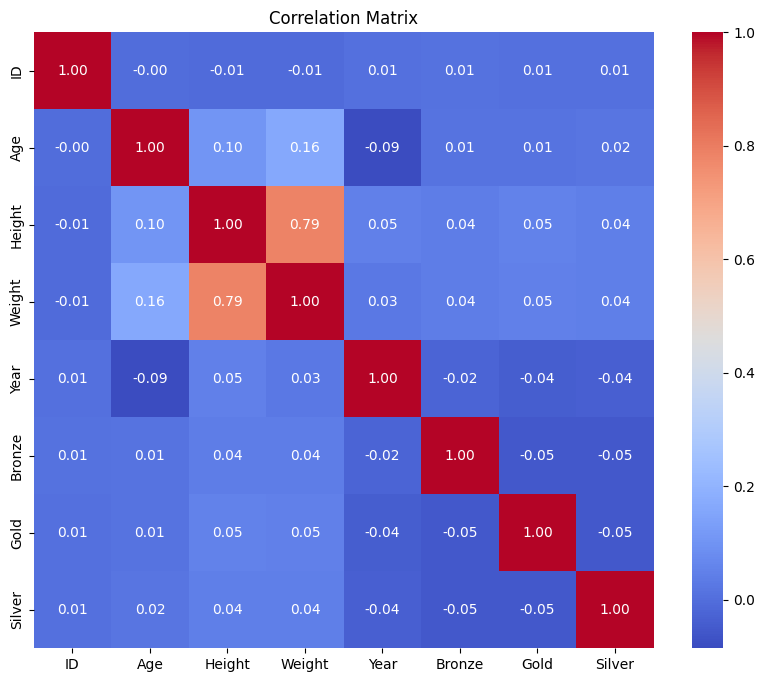

In [37]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Data Transformation

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
# Select numerical columns to scale
numerical_cols = ['Age']

In [40]:
scaler = MinMaxScaler()

In [41]:
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [42]:
print(df.head())

   ID                                Name Sex       Age  Height  Weight  \
0   1                           A Dijiang   M  0.160920   180.0    80.0   
1   2                            A Lamusi   M  0.149425   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  0.160920   175.0    70.0   
3   4                Edgar Lindenau Aabye   M  0.275862   175.0    70.0   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  0.091954   168.0    70.0   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region  Bronze  Gold  Silver  
0   B

# Feature Engineering

In [43]:
df.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']]

Gold  Silver  Bronze
NOC                      
AFG     0       0       2
AHO     0       1       0
ALB     0       0       0
ALG     5       4       8
AND     0       0       0
..    ...     ...     ...
YEM     0       0       0
YMD     0       0       0
YUG   130     161      92
ZAM     0       1       1
ZIM    17       4       1

[230 rows x 3 columns]

# to display this data in sorted order as per the nation that has won highest number of medals


In [44]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index().head(25)

NOC  Gold  Silver  Bronze
0   USA  2472    1333    1197
1   URS   832     635     596
2   GBR   635     729     620
3   GER   592     538     649
4   ITA   518     474     454
5   FRA   463     567     587
6   HUN   432     328     363
7   SWE   354     396     358
8   AUS   342     452     510
9   GDR   339     277     227
10  CHN   334     317     258
11  RUS   296     278     331
12  NED   245     302     371
13  JPN   230     287     333
14  NOR   227     196     167
15  DEN   179     236     177
16  KOR   171     206     175
17  CUB   164     129     116
18  ROU   161     200     290
19  CAN   158     239     344
20  FRG   144     172     188
21  FIN   132     125     217
22  IND   131      19      40
23  YUG   130     161      92
24  POL   111     185     242

# it's considering all team members of winner team as individual athletes while medal count

In [45]:
df.head()

ID                                Name Sex       Age  Height  Weight  \
0   1                           A Dijiang   M  0.160920   180.0    80.0   
1   2                            A Lamusi   M  0.149425   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  0.160920   175.0    70.0   
3   4                Edgar Lindenau Aabye   M  0.275862   175.0    70.0   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  0.091954   168.0    70.0   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region  Bronze  Gold  Silver  
0   Basketball Men's Basketball   NaN        China       0     0       0  
1  Judo Men's Extra-Lightweight   NaN        China       0     0       0  
2       Football Men's Football   NaN      Denmark       0     0       0  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark       0     1       0  
4  Athletics Women's 100 metres   NaN  Netherlands       0     0       0

In [46]:
df[(df['NOC']=='IND') & (df['Medal']=='Gold')]

ID                    Name Sex       Age  Height  Weight   Team  \
4186      2699             Shaukat Ali   M  0.229885   175.0    70.0  India   
4190      2703        Syed Mushtaq Ali   M  0.137931   165.0    61.0  India   
4460      2864     Richard James Allen   M  0.172414   172.0    70.0  India   
4461      2864     Richard James Allen   M  0.229885   172.0    70.0  India   
4462      2864     Richard James Allen   M  0.275862   172.0    70.0  India   
...        ...                     ...  ..       ...     ...     ...    ...   
191759  117232      Dung Dung Sylvanus   M  0.241379   160.0    62.0  India   
193964  118553  Carlyle Carrol Tapsell   M  0.149425   182.0    70.0  India   
193965  118553  Carlyle Carrol Tapsell   M  0.195402   182.0    70.0  India   
205949  125560         Max "Maxie" Vaz   M  0.160920   175.0    70.0  India   
219336  133554    Sayed Muhammad Yusuf   M  0.160920   175.0    70.0  India   

        NOC        Games  Year  Season         City   Sport  \
4186    IND  1928 Summer  1928  Summer    Amsterdam  Hockey   
4190    IND  1964 Summer  1964  Summer        Tokyo  Hockey   
4460    IND  1928 Summer  1928  Summer    Amsterdam  Hockey   
4461    IND  1932 Summer  1932  Summer  Los Angeles  Hockey   
4462    IND  1936 Summer  1936  Summer       Berlin  Hockey   
...     ...          ...   ...     ...          ...     ...   
191759  IND  1980 Summer  1980  Summer       Moskva  Hockey   
193964  IND  1932 Summer  1932  Summer  Los Angeles  Hockey   
193965  IND  1936 Summer  1936  Summer       Berlin  Hockey   
205949  IND  1948 Summer  1948  Summer       London  Hockey   
219336  IND  1928 Summer  1928  Summer    Amsterdam  Hockey   

                      Event Medal region  Bronze  Gold  Silver  
4186    Hockey Men's Hockey  Gold  India       0     1       0  
4190    Hockey Men's Hockey  Gold  India       0     1       0  
4460    Hockey Men's Hockey  Gold  India       0     1       0  
4461    Hockey Men's Hockey  Gold  India       0     1       0  
4462    Hockey Men's Hockey  Gold  India       0     1       0  
...                     ...   ...    ...     ...   ...     ...  
191759  Hockey Men's Hockey  Gold  India       0     1       0  
193964  Hockey Men's Hockey  Gold  India       0     1       0  
193965  Hockey Men's Hockey  Gold  India       0     1       0  
205949  Hockey Men's Hockey  Gold  India       0     1       0  
219336  Hockey Men's Hockey  Gold  India       0     1       0  

[131 rows x 19 columns]

these unique columns represent a team

In [47]:
medal_tally=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [48]:
medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

NOC  Gold  Silver  Bronze
0    USA  1035     802     708
1    URS   394     317     294
2    GBR   278     317     300
3    GER   235     261     283
4    FRA   234     256     287
..   ...   ...     ...     ...
225  AHO     0       1       0
226  LBR     0       0       0
227  LCA     0       0       0
228  LES     0       0       0
229  LBA     0       0       0

[230 rows x 4 columns]

In [49]:
medal_tally=medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [50]:
medal_tally[medal_tally['NOC']=='IND']

NOC  Gold  Silver  Bronze
53  IND     9       7      12

In [51]:
medal_tally['total']=medal_tally['Gold']+medal_tally['Silver']+medal_tally['Bronze']

In [52]:
years=df['Year'].unique().tolist()

In [53]:
years.sort()

In [54]:
years.insert(0,'Overall')

In [55]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [56]:
country=df['region'].dropna().unique().tolist()

In [57]:
country.sort()

In [58]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [59]:
country.insert(0,'Overall')

In [60]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

# viewing overall medal tally of every country

In [61]:
def fetch_medal_tally(df, year, country):
    # Drop duplicate rows based on specific columns
    medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

    # Filter based on year and country
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    elif year == 'Overall' and country != 'Overall':
        temp_df = medal_df[medal_df['region'] == country]
    elif year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    elif year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == int(year)) & (medal_df['region'] == country)]

    # Group by year or region based on input parameters
    if year == 'Overall' and country != 'Overall':
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

    # Add a total column
    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    print(x)


# to view data that in every year india has won how many medals

In [62]:
fetch_medal_tally(df,year='Overall',country='India')

    Year  Gold  Silver  Bronze  total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


In [63]:
fetch_medal_tally(df,year=2008,country='India')

  region  Gold  Silver  Bronze  total
0  India     1       0       2      3


In [64]:
fetch_medal_tally(df,year=2008,country='Overall')

          region  Gold  Silver  Bronze  total
0          China    51      21      28    100
1            USA    36      39      35    110
2         Russia    23      21      28     72
3             UK    19      13      16     48
4        Germany    18      10      15     43
..           ...   ...     ...     ...    ...
196         Iraq     0       0       0      0
197      Ireland     0       1       2      3
198       Israel     0       0       1      1
199  Ivory Coast     0       0       0      0
200        Libya     0       0       0      0

[201 rows x 5 columns]


# Overall Analysis


*   Number of editions
*   number of cities
*   num of events/sports
*   number of athletes
*   participating nations




In [65]:
df.head()

ID                                Name Sex       Age  Height  Weight  \
0   1                           A Dijiang   M  0.160920   180.0    80.0   
1   2                            A Lamusi   M  0.149425   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  0.160920   175.0    70.0   
3   4                Edgar Lindenau Aabye   M  0.275862   175.0    70.0   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  0.091954   168.0    70.0   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region  Bronze  Gold  Silver  
0   Basketball Men's Basketball   NaN        China       0     0       0  
1  Judo Men's Extra-Lightweight   NaN        China       0     0       0  
2       Football Men's Football   NaN      Denmark       0     0       0  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark       0     1       0  
4  Athletics Women's 100 metres   NaN  Netherlands       0     0       0

In [66]:
df['Year'].unique()

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896])

In [67]:
df['Year'].unique().shape[0]-1

28

In [68]:
df['City'].nunique()

23

In [69]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [70]:
df['Sport'].nunique()

52

In [71]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [72]:
df['Event'].nunique()

651

In [73]:
df['Name'].nunique()

116122

In [74]:
df['region'].nunique()

205

In [75]:
df.head()

ID                                Name Sex       Age  Height  Weight  \
0   1                           A Dijiang   M  0.160920   180.0    80.0   
1   2                            A Lamusi   M  0.149425   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  0.160920   175.0    70.0   
3   4                Edgar Lindenau Aabye   M  0.275862   175.0    70.0   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  0.091954   168.0    70.0   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region  Bronze  Gold  Silver  
0   Basketball Men's Basketball   NaN        China       0     0       0  
1  Judo Men's Extra-Lightweight   NaN        China       0     0       0  
2       Football Men's Football   NaN      Denmark       0     0       0  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark       0     1       0  
4  Athletics Women's 100 metres   NaN  Netherlands       0     0       0

In [76]:
df.drop_duplicates(subset=['Year','region'])

ID                                Name Sex       Age  Height  \
0            1                           A Dijiang   M  0.160920   180.0   
1            2                            A Lamusi   M  0.149425   170.0   
2            3                 Gunnar Nielsen Aaby   M  0.160920   175.0   
3            4                Edgar Lindenau Aabye   M  0.275862   175.0   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  0.091954   168.0   
...        ...                                 ...  ..       ...     ...   
198805  121320           Horatio Tertuliano Torrom   M  0.160920   175.0   
203075  123858                 Lloyd Oscar Valberg   M  0.183908   175.0   
209763  127894                 Bruno Julius Wagner   M  0.172414   185.0   
215352  131186                     Antoni Wiwulski   M  0.287356   175.0   
216735  132030                Mariana Dias Ximenes   F  0.160920   151.0   

        Weight            Team  NOC        Games  Year  Season         City  \
0         80.0           China  CHN  1992 Summer  1992  Summer    Barcelona   
1         60.0           China  CHN  2012 Summer  2012  Summer       London   
2         70.0         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen   
3         70.0  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris   
4         70.0     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
...        ...             ...  ...          ...   ...     ...          ...   
198805    70.0       Argentina  ARG  1908 Summer  1908  Summer       London   
203075    70.0       Singapore  SGP  1948 Summer  1948  Summer       London   
209763    82.0     Switzerland  SUI  1908 Summer  1908  Summer       London   
215352    70.0          Poland  POL  1912 Summer  1912  Summer    Stockholm   
216735    48.0     Timor Leste  TLS  2008 Summer  2008  Summer      Beijing   

                   Sport                               Event Medal  \
0             Basketball         Basketball Men's Basketball   NaN   
1                   Judo        Judo Men's Extra-Lightweight   NaN   
2               Football             Football Men's Football   NaN   
3             Tug-Of-War         Tug-Of-War Men's Tug-Of-War  Gold   
4              Athletics        Athletics Women's 100 metres   NaN   
...                  ...                                 ...   ...   
198805    Figure Skating        Figure Skating Men's Singles   NaN   
203075         Athletics           Athletics Men's High Jump   NaN   
209763         Athletics        Athletics Men's Hammer Throw   NaN   
215352  Art Competitions  Art Competitions Mixed Sculpturing   NaN   
216735         Athletics          Athletics Women's Marathon   NaN   

             region  Bronze  Gold  Silver  
0             China       0     0       0  
1             China       0     0       0  
2           Denmark       0     0       0  
3           Denmark       0     1       0  
4       Netherlands       0     0       0  
...             ...     ...   ...     ...  
198805    Argentina       0     0       0  
203075          NaN       0     0       0  
209763  Switzerland       0     0       0  
215352       Poland       0     0       0  
216735  Timor-Leste       0     0       0  

[2786 rows x 19 columns]

# participating nations over time

In [77]:
df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

Year  count
28  1896     12
22  1900     31
27  1904     14
26  1906     20
25  1908     22
24  1912     29
23  1920     29
21  1924     45
20  1928     46
19  1932     47
18  1936     49
17  1948     59
16  1952     67
15  1956     71
13  1960     83
11  1964     93
10  1968    111
9   1972    120
12  1976     91
14  1980     80
8   1984    139
7   1988    156
6   1992    168
5   1996    196
4   2000    199
3   2004    200
2   2008    202
1   2012    203
0   2016    204

### Converted into data frame

In [78]:
df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

Year  count
28  1896     12
22  1900     31
27  1904     14
26  1906     20
25  1908     22
24  1912     29
23  1920     29
21  1924     45
20  1928     46
19  1932     47
18  1936     49
17  1948     59
16  1952     67
15  1956     71
13  1960     83
11  1964     93
10  1968    111
9   1972    120
12  1976     91
14  1980     80
8   1984    139
7   1988    156
6   1992    168
5   1996    196
4   2000    199
3   2004    200
2   2008    202
1   2012    203
0   2016    204

In [79]:
nations_over_time=df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

In [80]:
nations_over_time.rename(columns={'count':'Number Of Countries','Year':'Edition'},inplace=True)

In [81]:
nations_over_time

Edition  Number Of Countries
28     1896                   12
22     1900                   31
27     1904                   14
26     1906                   20
25     1908                   22
24     1912                   29
23     1920                   29
21     1924                   45
20     1928                   46
19     1932                   47
18     1936                   49
17     1948                   59
16     1952                   67
15     1956                   71
13     1960                   83
11     1964                   93
10     1968                  111
9      1972                  120
12     1976                   91
14     1980                   80
8      1984                  139
7      1988                  156
6      1992                  168
5      1996                  196
4      2000                  199
3      2004                  200
2      2008                  202
1      2012                  203
0      2016                  204

# Data Visualization

In [82]:
# Function to plot the top N categories
def plot_top_n(df, column, n=10, title="", xlabel="", ylabel=""):
    plt.figure(figsize=(14, 8))
    top_n = df[column].value_counts().nlargest(n)
    sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

<ipython-input-82-cb9d0e68f68d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')


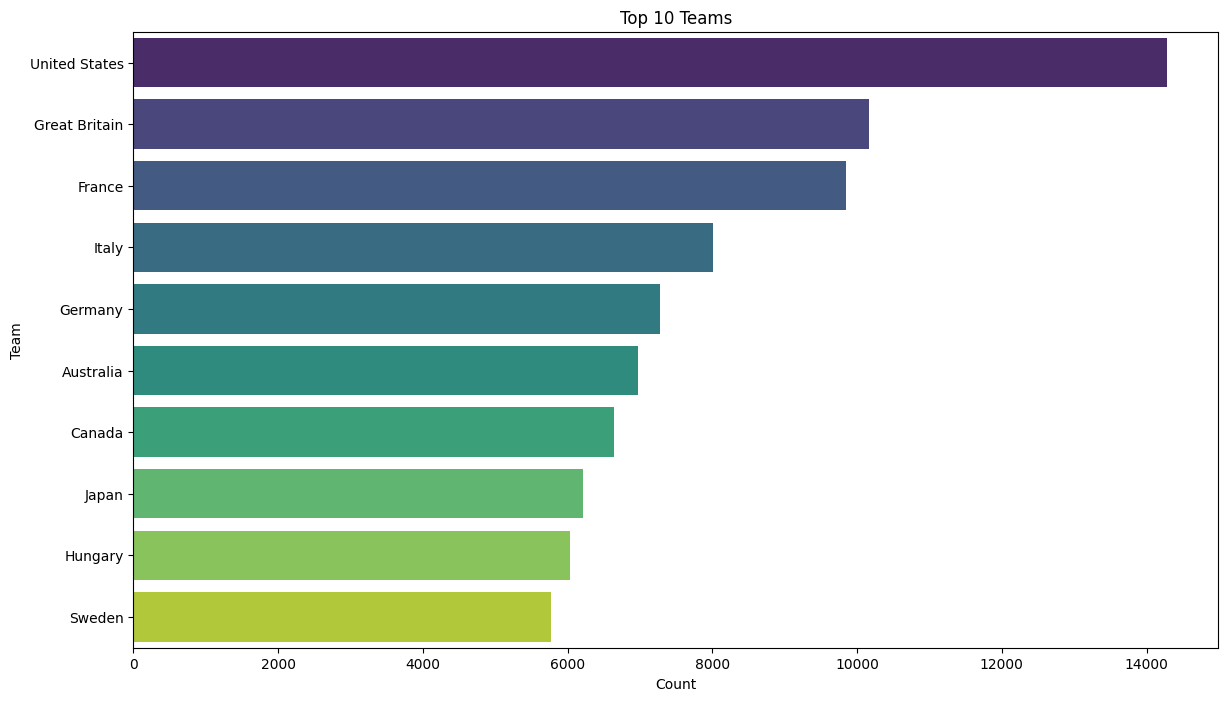

In [83]:
# Plot top 10 Teams
# Bar Plot of Country Distribution
plot_top_n(df, 'Team', n=10, title='Top 10 Teams', xlabel='Count', ylabel='Team')

<ipython-input-82-cb9d0e68f68d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')


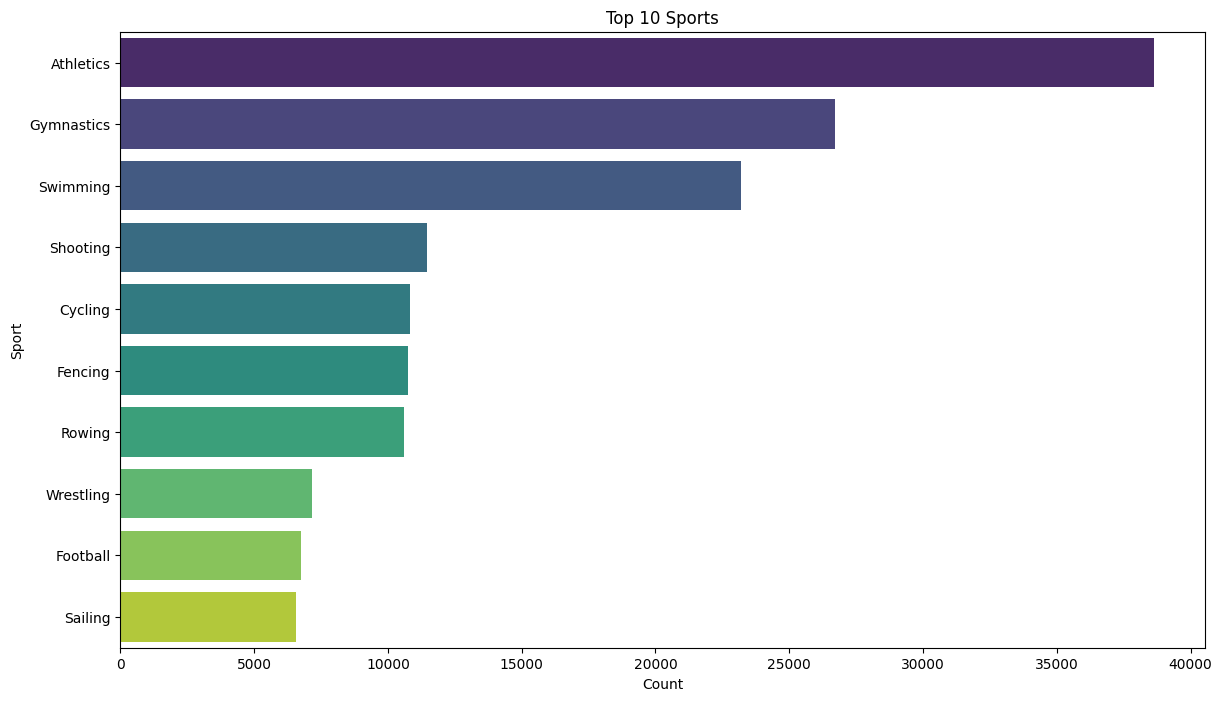

In [84]:
# Plot top 10 Sports
# Bar Plot of Sport Distribution
plot_top_n(df, 'Sport', n=10, title='Top 10 Sports', xlabel='Count', ylabel='Sport')

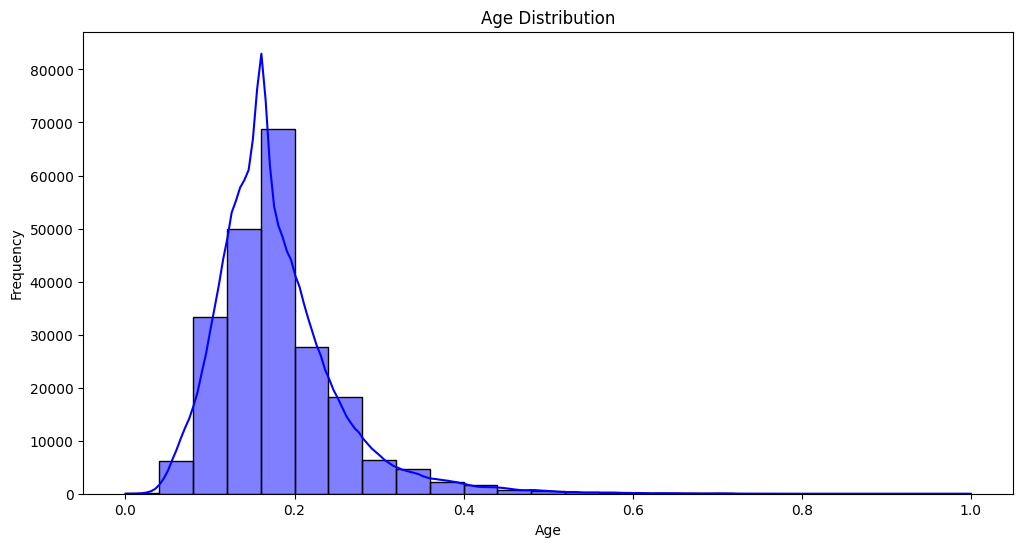

In [85]:
# Histogram of Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=25, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

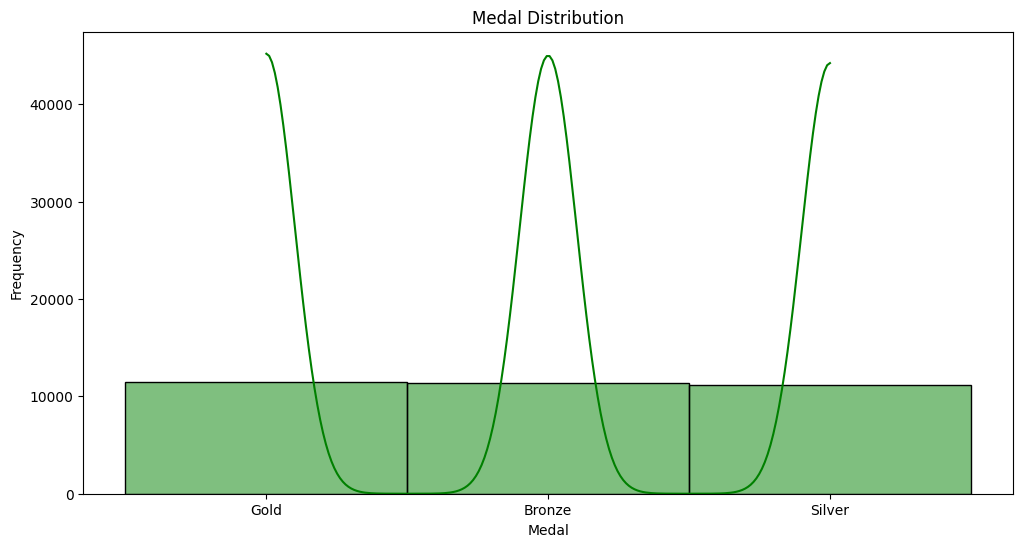

In [86]:
# Histogram of Medals Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Medal'], bins=25, kde=True, color='green')
plt.title('Medal Distribution')
plt.xlabel('Medal')
plt.ylabel('Frequency')
plt.show()

<ipython-input-87-8b113d861eec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sport', y='Age', data=df, palette='muted')


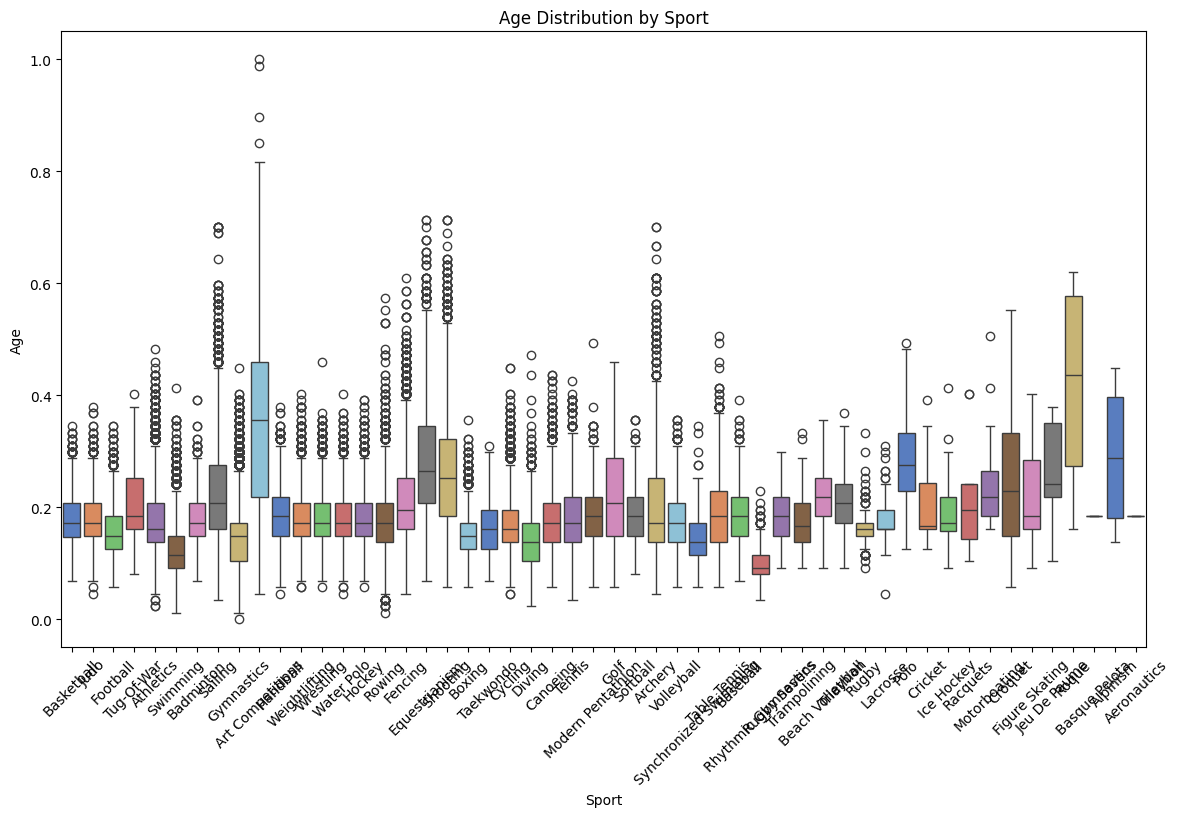

In [87]:
# Box Plot of Age by Sport
plt.figure(figsize=(14, 8))
sns.boxplot(x='Sport', y='Age', data=df, palette='muted')
plt.title('Age Distribution by Sport')
plt.xlabel('Sport')
plt.ylabel('Age')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

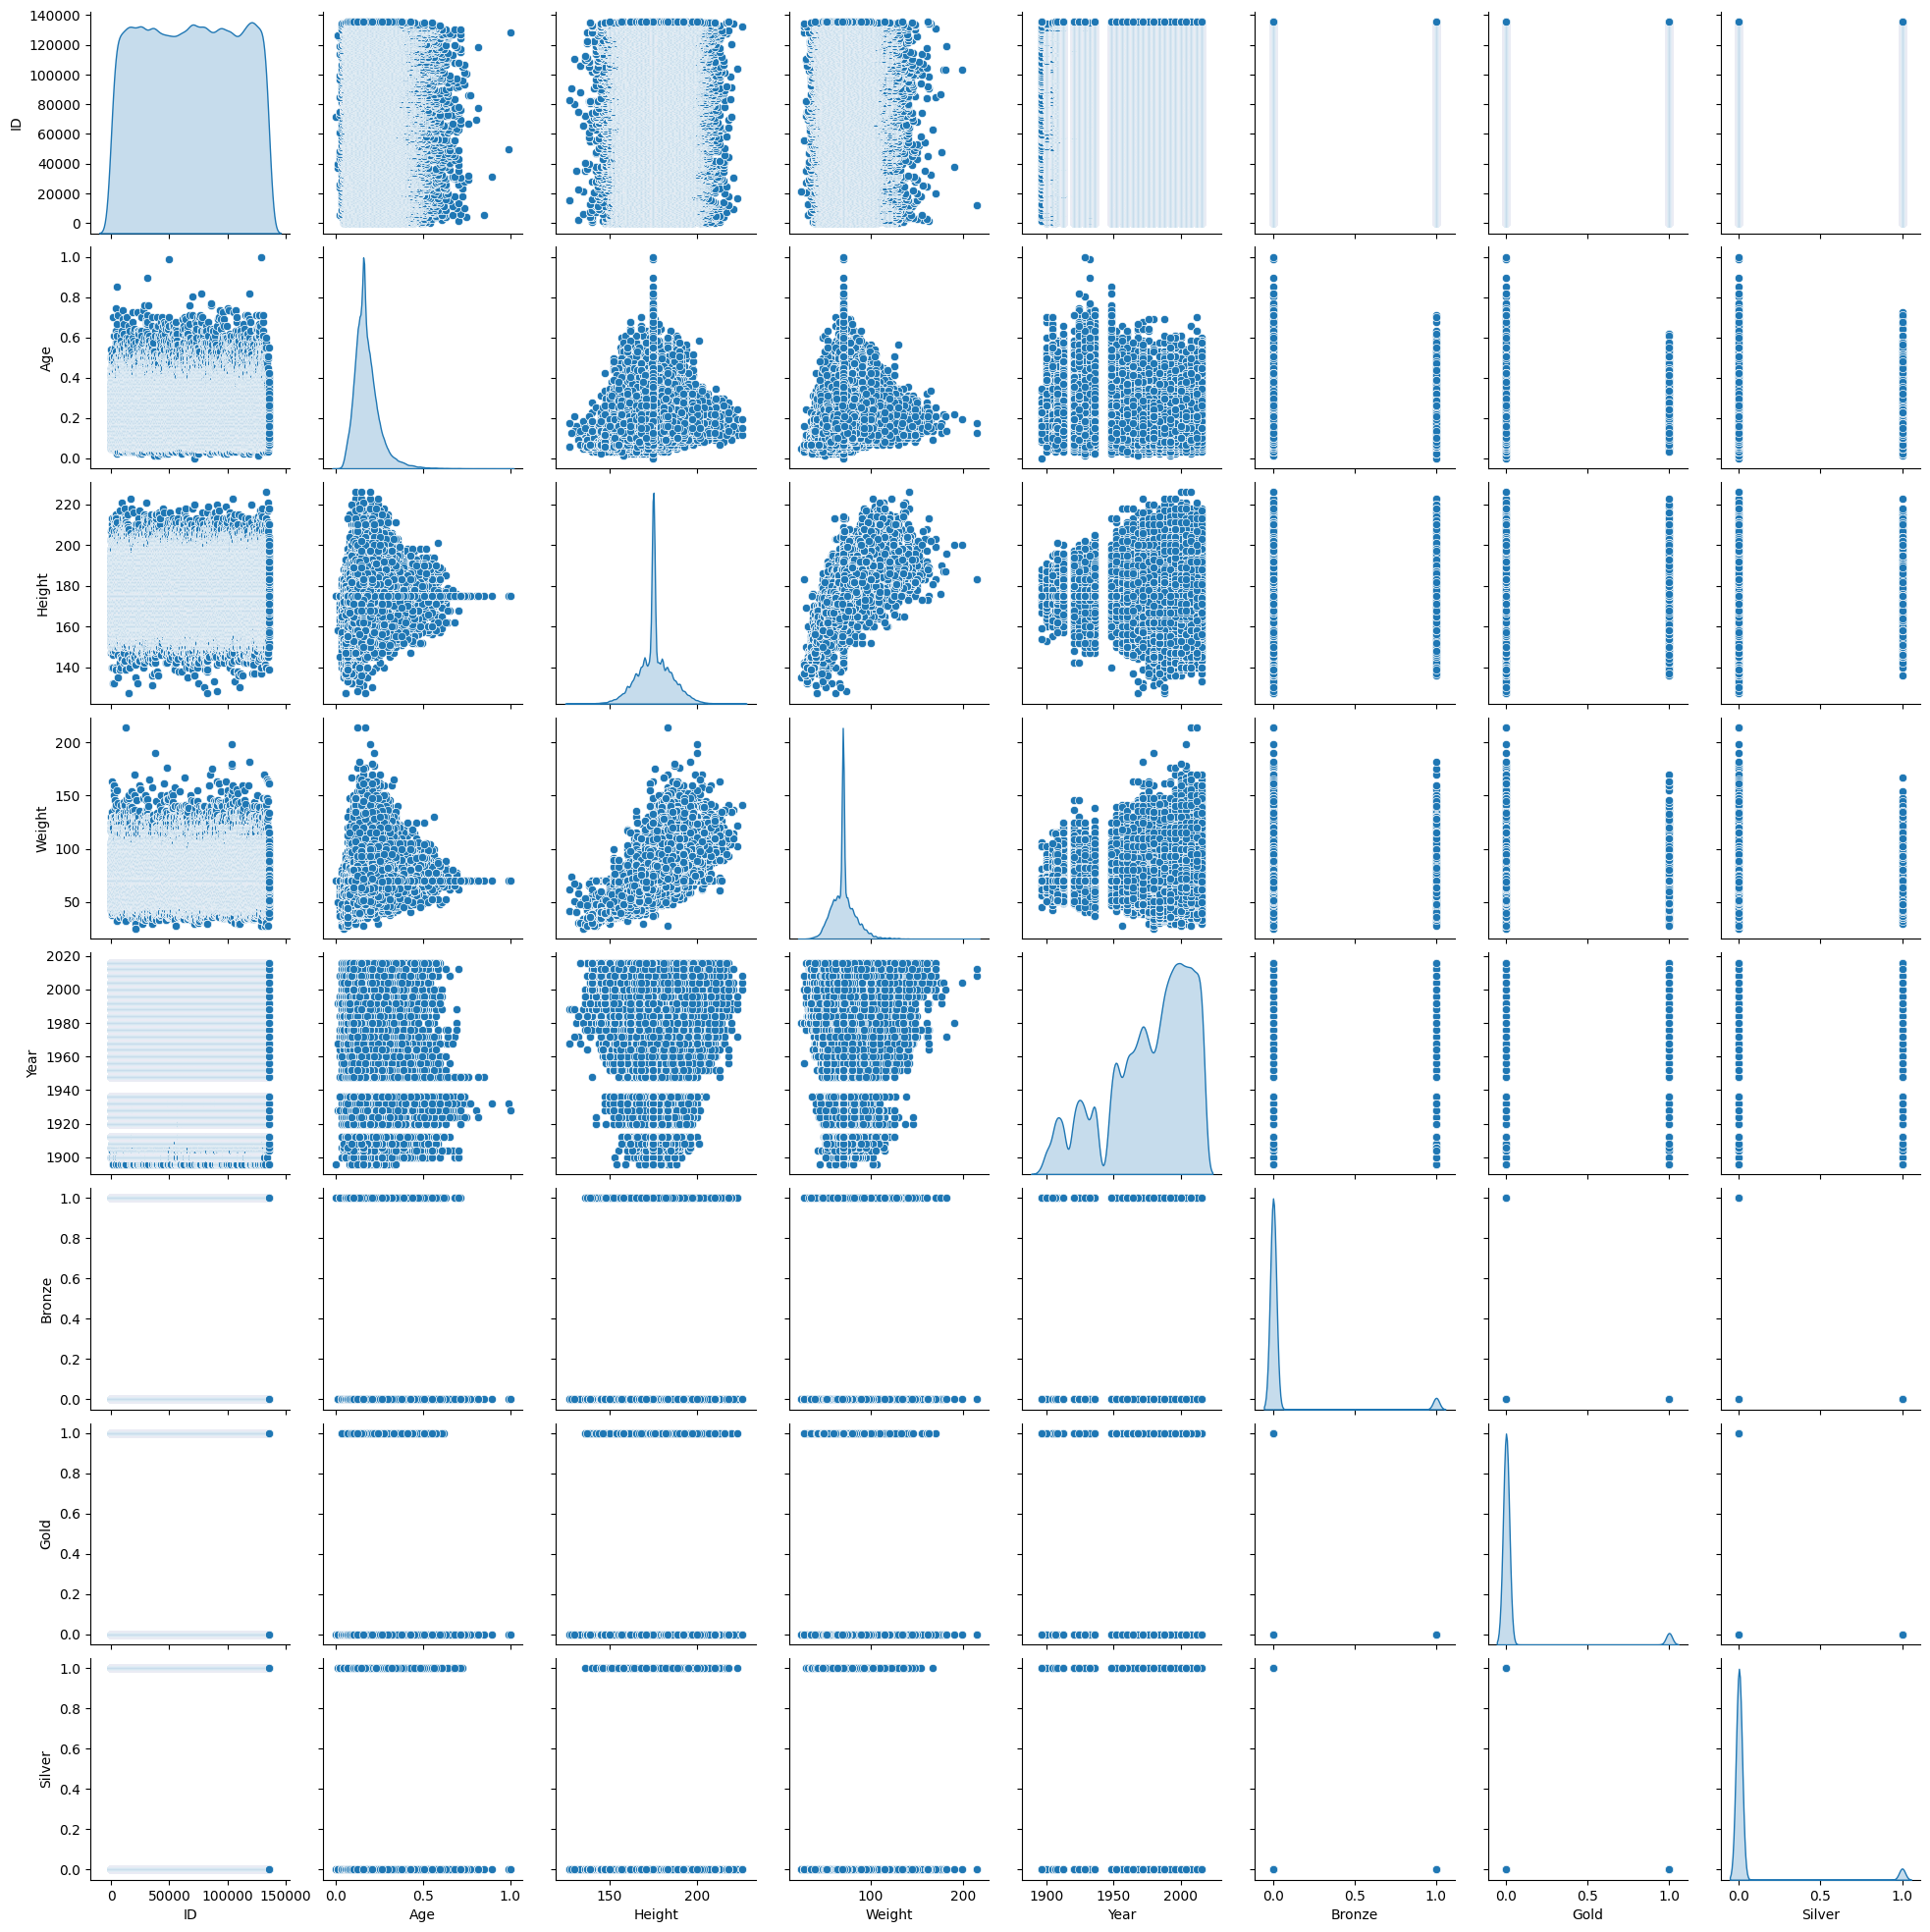

In [88]:
# Pairplot of Numerical Variables
sns.pairplot(df, diag_kind='kde')
plt.show()

# Number of Countries participated over years

In [89]:
import plotly.express as plt

fig=plt.line(nations_over_time,x='Edition',y='Number Of Countries')
fig.show()

# Number of events held per year

In [90]:
df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('Year')

Year  count
28  1896     43
26  1900     90
25  1904     95
27  1906     74
23  1908    109
24  1912    107
14  1920    158
20  1924    131
22  1928    122
21  1932    131
18  1936    150
15  1948    153
19  1952    149
16  1956    151
17  1960    150
13  1964    163
12  1968    172
11  1972    193
10  1976    198
9   1980    203
8   1984    221
7   1988    237
6   1992    257
5   1996    271
4   2000    300
3   2004    301
1   2008    302
2   2012    302
0   2016    306

In [91]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# No. of Events held vs year

<Axes: xlabel='Year', ylabel='Sport'>

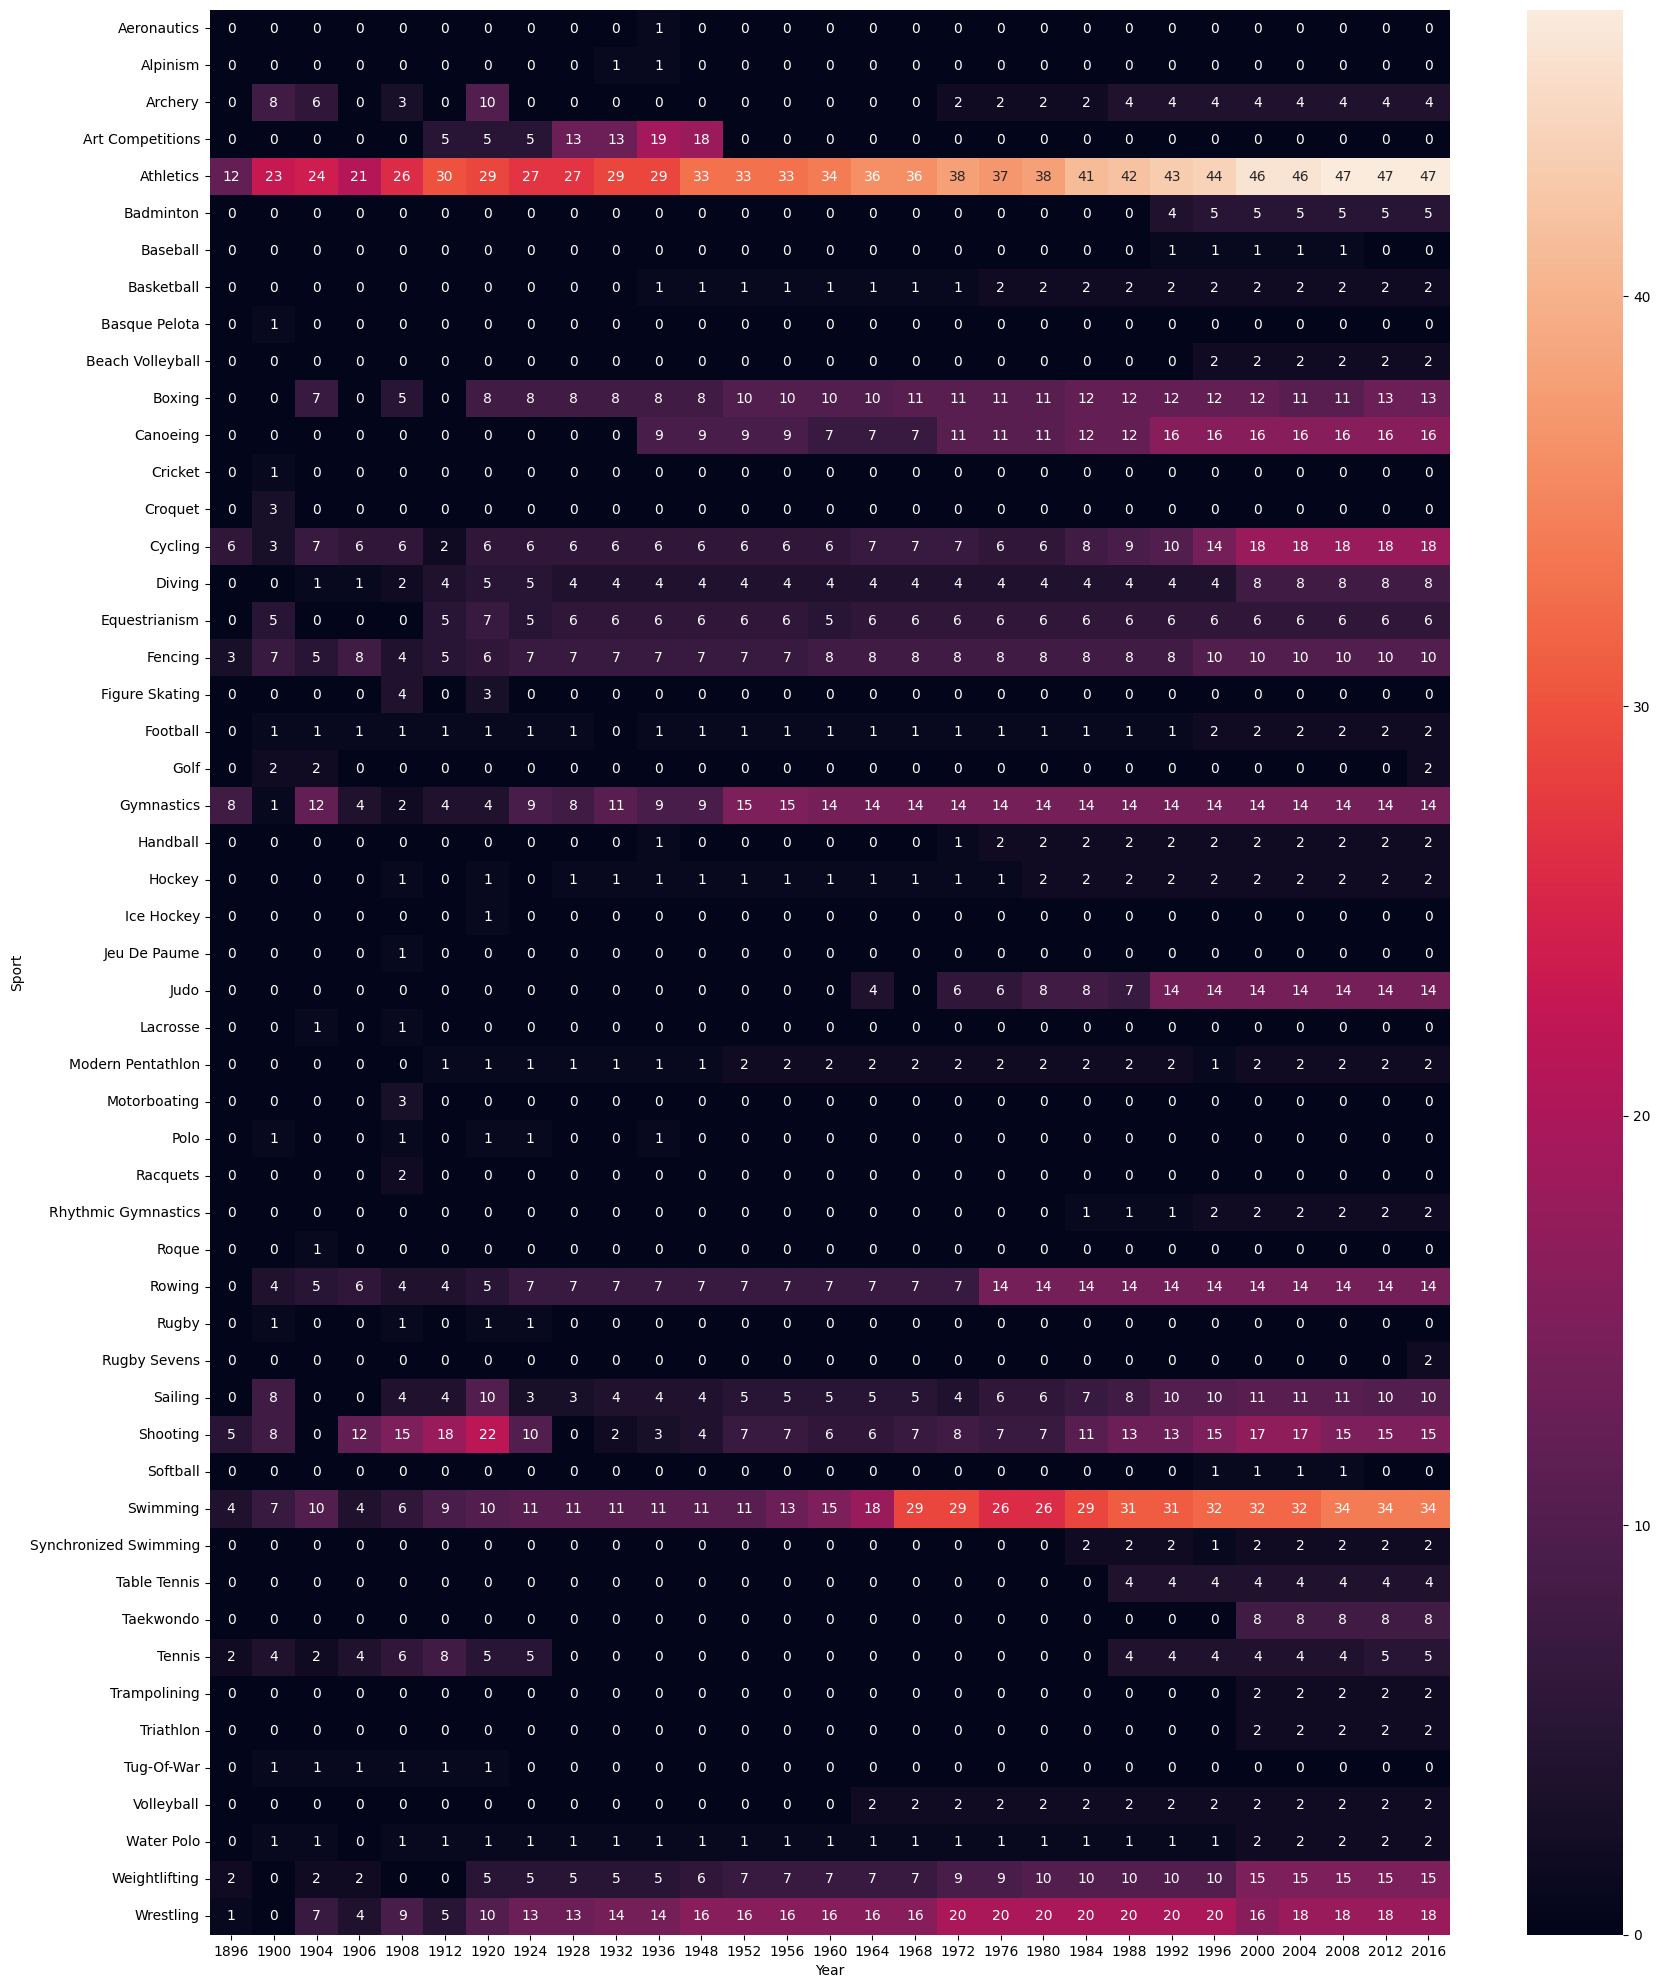

In [92]:
#plt.figure(figsize=(25,25))
x=df.drop_duplicates(['Year','Sport','Event'])
plt.figure(figsize=(20, 25))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [93]:
x=df.drop_duplicates(['Year','Sport','Event'])

<Axes: xlabel='Year', ylabel='Sport'>

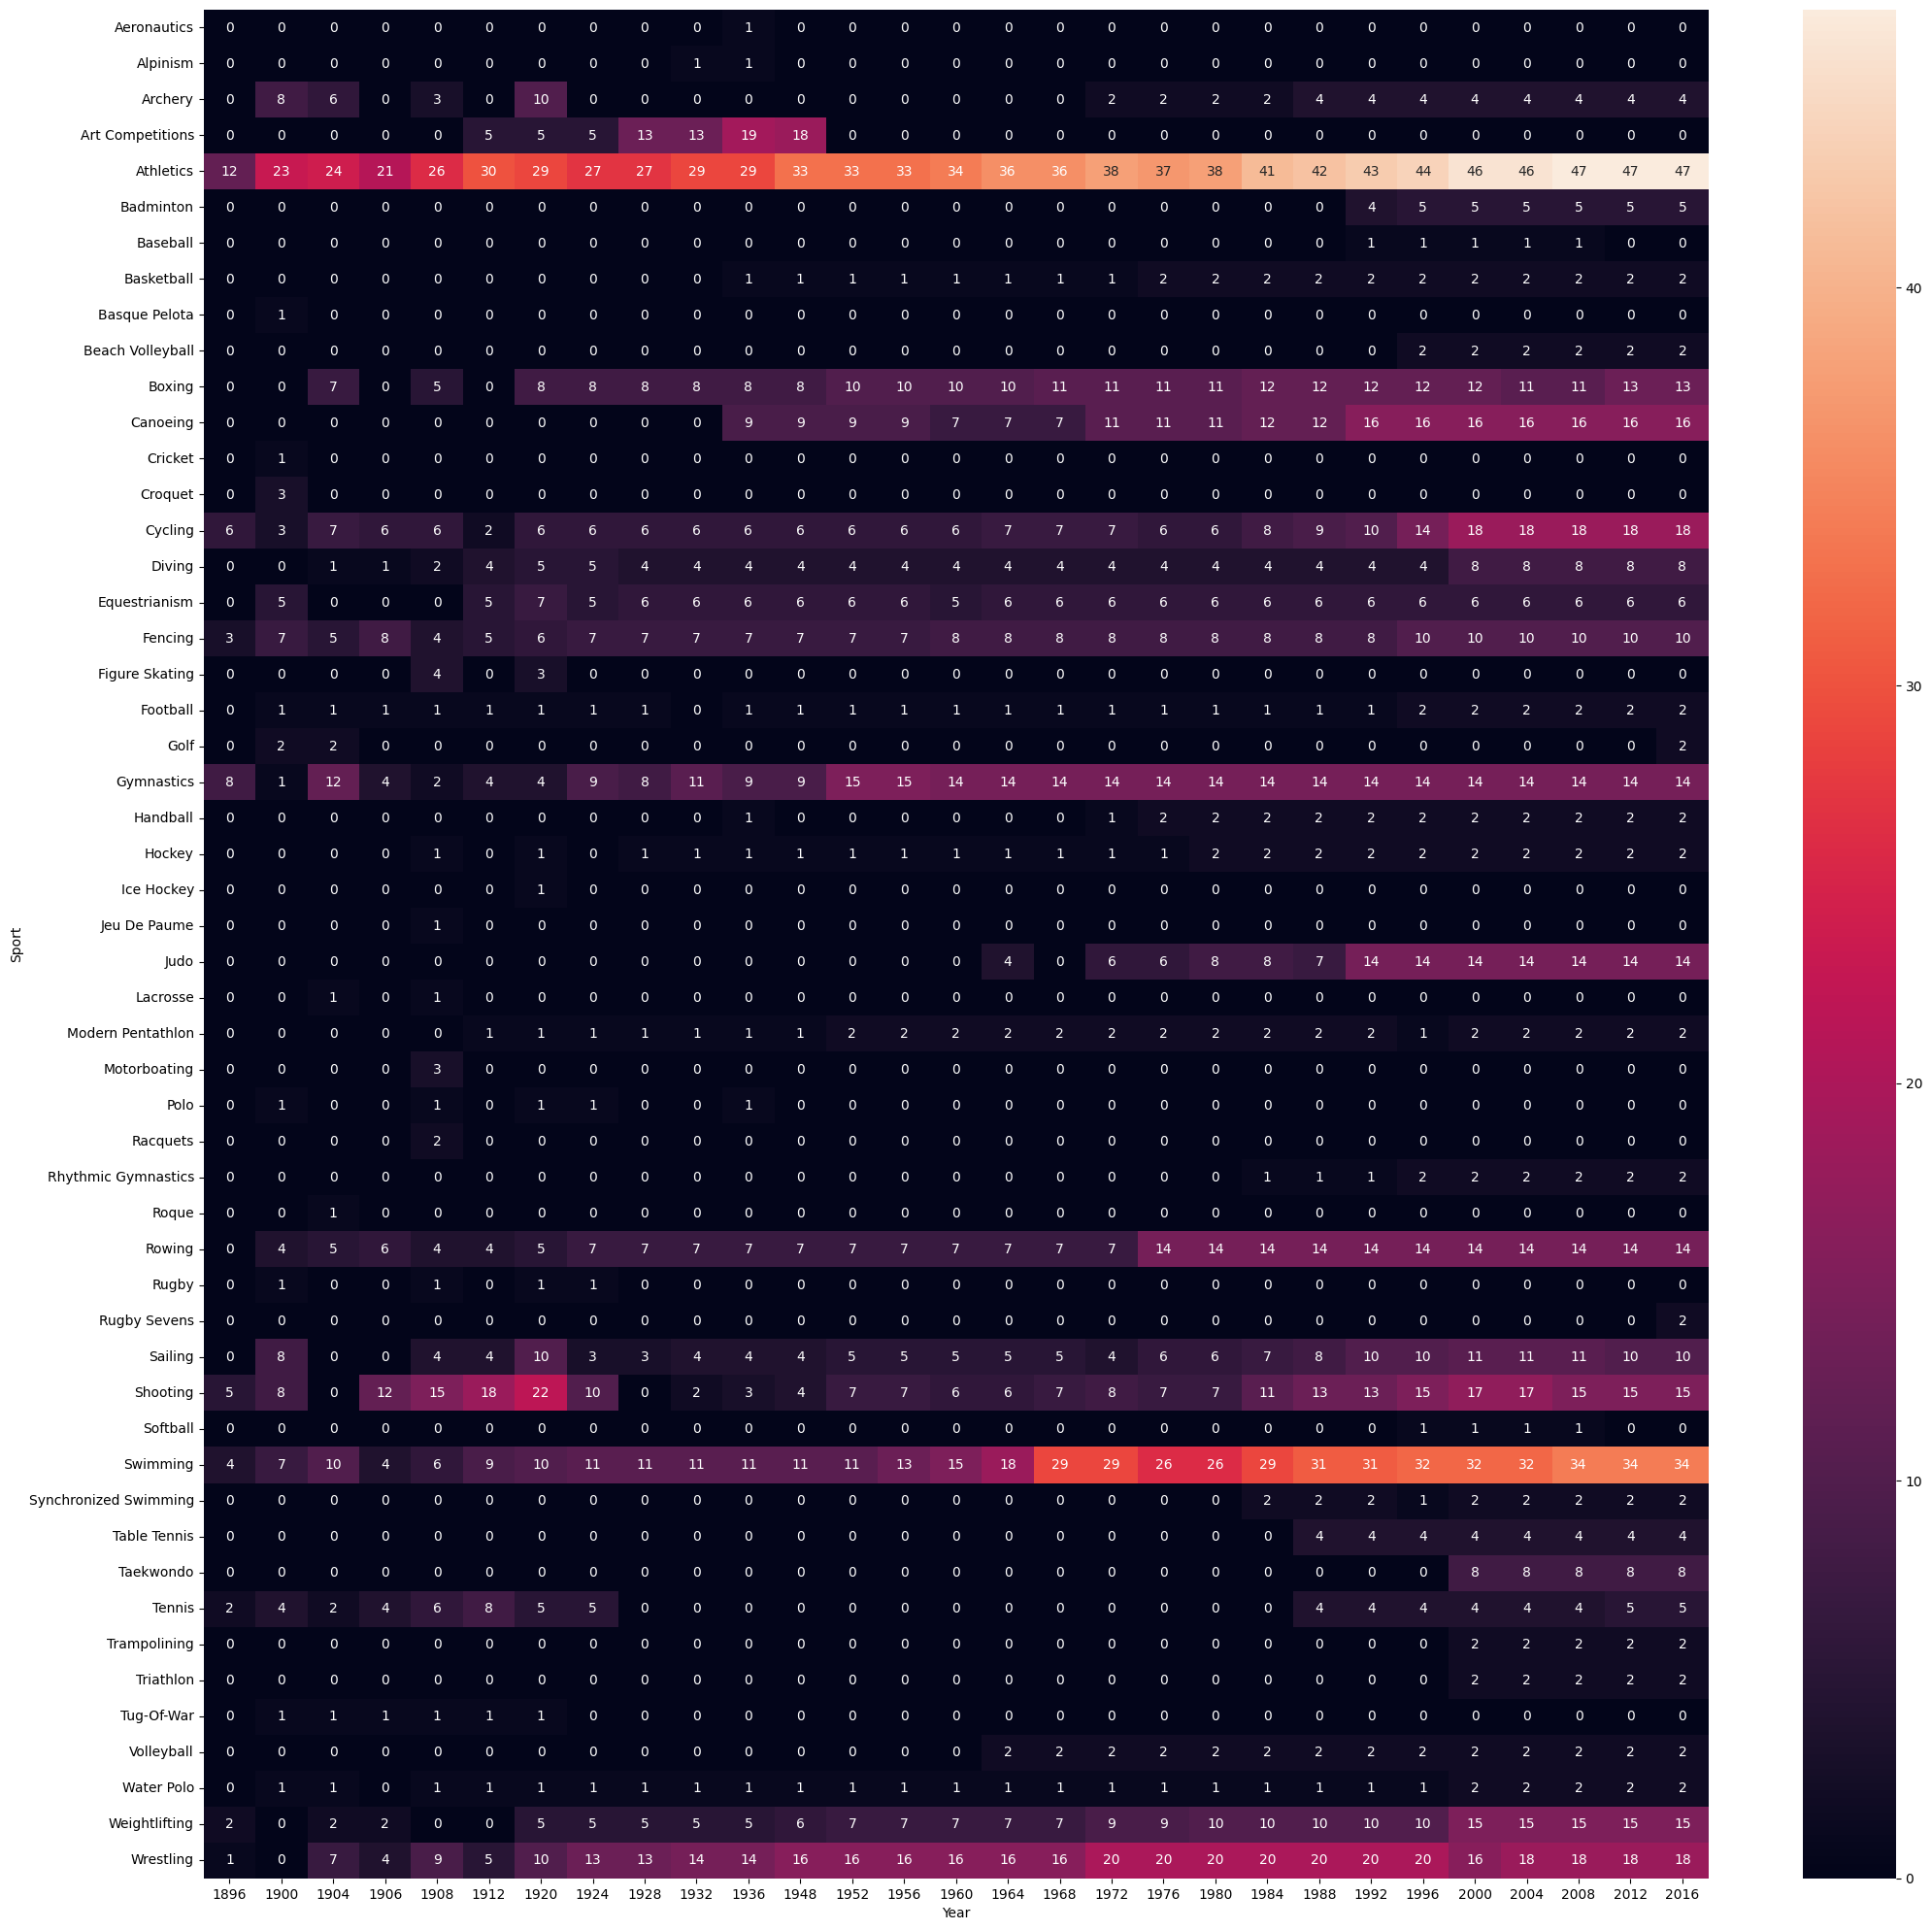

In [94]:
import seaborn as sns

plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

# viewing only winners data

In [95]:
df.dropna(subset=['Medal'])

ID                                 Name Sex       Age  Height  \
3            4                 Edgar Lindenau Aabye   M  0.275862   175.0   
12          15                 Arvo Ossian Aaltonen   M  0.229885   175.0   
13          15                 Arvo Ossian Aaltonen   M  0.229885   175.0   
15          17              Paavo Johannes Aaltonen   M  0.206897   175.0   
16          17              Paavo Johannes Aaltonen   M  0.206897   175.0   
...        ...                                  ...  ..       ...     ...   
222528  135553  Galina Ivanovna Zybina (-Fyodorova)   F  0.172414   168.0   
222530  135553  Galina Ivanovna Zybina (-Fyodorova)   F  0.264368   168.0   
222532  135554                         Bogusaw Zych   M  0.206897   182.0   
222544  135563            Olesya Nikolayevna Zykina   F  0.103448   171.0   
222545  135563            Olesya Nikolayevna Zykina   F  0.149425   171.0   

        Weight            Team  NOC        Games  Year  Season       City  \
3         70.0  Denmark/Sweden  DEN  1900 Summer  1900  Summer      Paris   
12        70.0         Finland  FIN  1920 Summer  1920  Summer  Antwerpen   
13        70.0         Finland  FIN  1920 Summer  1920  Summer  Antwerpen   
15        64.0         Finland  FIN  1948 Summer  1948  Summer     London   
16        64.0         Finland  FIN  1948 Summer  1948  Summer     London   
...        ...             ...  ...          ...   ...     ...        ...   
222528    80.0    Soviet Union  URS  1956 Summer  1956  Summer  Melbourne   
222530    80.0    Soviet Union  URS  1964 Summer  1964  Summer      Tokyo   
222532    82.0          Poland  POL  1980 Summer  1980  Summer     Moskva   
222544    64.0          Russia  RUS  2000 Summer  2000  Summer     Sydney   
222545    64.0          Russia  RUS  2004 Summer  2004  Summer     Athina   

             Sport                                   Event   Medal   region  \
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War    Gold  Denmark   
12        Swimming  Swimming Men's 200 metres Breaststroke  Bronze  Finland   
13        Swimming  Swimming Men's 400 metres Breaststroke  Bronze  Finland   
15      Gymnastics  Gymnastics Men's Individual All-Around  Bronze  Finland   
16      Gymnastics        Gymnastics Men's Team All-Around    Gold  Finland   
...            ...                                     ...     ...      ...   
222528   Athletics              Athletics Women's Shot Put  Silver   Russia   
222530   Athletics              Athletics Women's Shot Put  Bronze   Russia   
222532     Fencing                Fencing Men's Foil, Team  Bronze   Poland   
222544   Athletics  Athletics Women's 4 x 400 metres Relay  Bronze   Russia   
222545   Athletics  Athletics Women's 4 x 400 metres Relay  Silver   Russia   

        Bronze  Gold  Silver  
3            0     1       0  
12           1     0       0  
13           1     0       0  
15           1     0       0  
16           0     1       0  
...        ...   ...     ...  
222528       0     0       1  
222530       1     0       0  
222532       1     0       0  
222544       1     0       0  
222545       0     0       1  

[34077 rows x 19 columns]

In [96]:
def most_successful(df,sport):
  temp_df=df.dropna(subset=['Medal'])

  if sport!='Overall':
    temp_df=temp_df[temp_df['Sport']==sport]

  return temp_df['Name'].value_counts().reset_index().head(15)

In [97]:
most_successful(df,'Swimming')

Name  count
0                           Michael Fred Phelps, II     28
1   Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)     12
2              Dara Grace Torres (-Hoffman, -Minas)     12
3                                Ryan Steven Lochte     12
4                     Natalie Anne Coughlin (-Hall)     12
5                    Matthew Nicholas "Matt" Biondi     11
6                                 Mark Andrew Spitz     11
7                              Gary Wayne Hall, Jr.     10
8                             Franziska van Almsick     10
9                         Shirley Frances Babashoff      9
10                                 Ian James Thorpe      9
11                               Leisel Marie Jones      9
12                    Aleksandr Vladimirovich Popov      9
13                         Zoltn Imre dn von Halmay      9
14                  Donald Arthur "Don" Schollander      8

In [98]:
def most_successful(df,sport):
  temp_df=df.dropna(subset=['Medal'])

  if sport!='Overall':
    temp_df=temp_df[temp_df['Sport']==sport]

  return temp_df['Name'].value_counts().reset_index().head(15).merge(df, left_on='Name', right_on='Name', how='right')[['Name', 'Sport']]


In [99]:
most_successful(df,'Swimming')

Name       Sport
0                                A Dijiang  Basketball
1                                 A Lamusi        Judo
2                      Gunnar Nielsen Aaby    Football
3                     Edgar Lindenau Aabye  Tug-Of-War
4       Cornelia "Cor" Aalten (-Strannood)   Athletics
...                                    ...         ...
221162            Fernando scar Zylberberg      Hockey
221163          James Francis "Jim" Zylker    Football
221164        Aleksandr Viktorovich Zyuzin      Rowing
221165        Aleksandr Viktorovich Zyuzin      Rowing
221166              Olga Igorevna Zyuzkova  Basketball

[221167 rows x 2 columns]

# Country Wise Analysis
* CountryWise medal tally per year (line plot)
* what countries are good st heatmeap
* most successful Athletes

In [100]:
temp_df=df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

In [101]:
temp_df.groupby('Year').count()['Medal']

Year
1896    120
1900    300
1904    280
1906    224
1908    322
1912    316
1920    449
1924    391
1928    356
1932    370
1936    422
1948    439
1952    457
1956    467
1960    461
1964    501
1968    527
1972    600
1976    613
1980    631
1984    685
1988    738
1992    814
1996    841
2000    925
2004    927
2008    963
2012    962
2016    973
Name: Medal, dtype: int64

In [102]:
new_df=temp_df[temp_df['region']=='India']
final_df=new_df.groupby('Year').count()['Medal'].reset_index()

In [103]:
fig=px.line(final_df,x='Year',y="Medal")
fig.show()

# Sports vs Year (Country-wise)

In [104]:
new_df=temp_df[temp_df['region']=='India']
plt.figure(figsize=(10,10))
new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0)

Year           1900  1928  1932  1936  1948  1952  1956  1960  1964  1968  \
Sport                                                                       
Athletics       2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Badminton       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Boxing          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Hockey          0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Shooting        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Tennis          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Weightlifting   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Wrestling       0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   

Year           1972  1980  1996  2000  2004  2008  2012  2016  
Sport                                                          
Athletics       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
Badminton       0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0  
Boxing          0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0  
Hockey          1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  
Shooting        0.0   0.0   0.0   0.0   1.0   1.0   2.0   0.0  
Tennis          0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  
Weightlifting   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  
Wrestling       0.0   0.0   0.0   0.0   0.0   1.0   2.0   1.0

<Figure size 1000x1000 with 0 Axes>

<Axes: xlabel='Year', ylabel='Sport'>

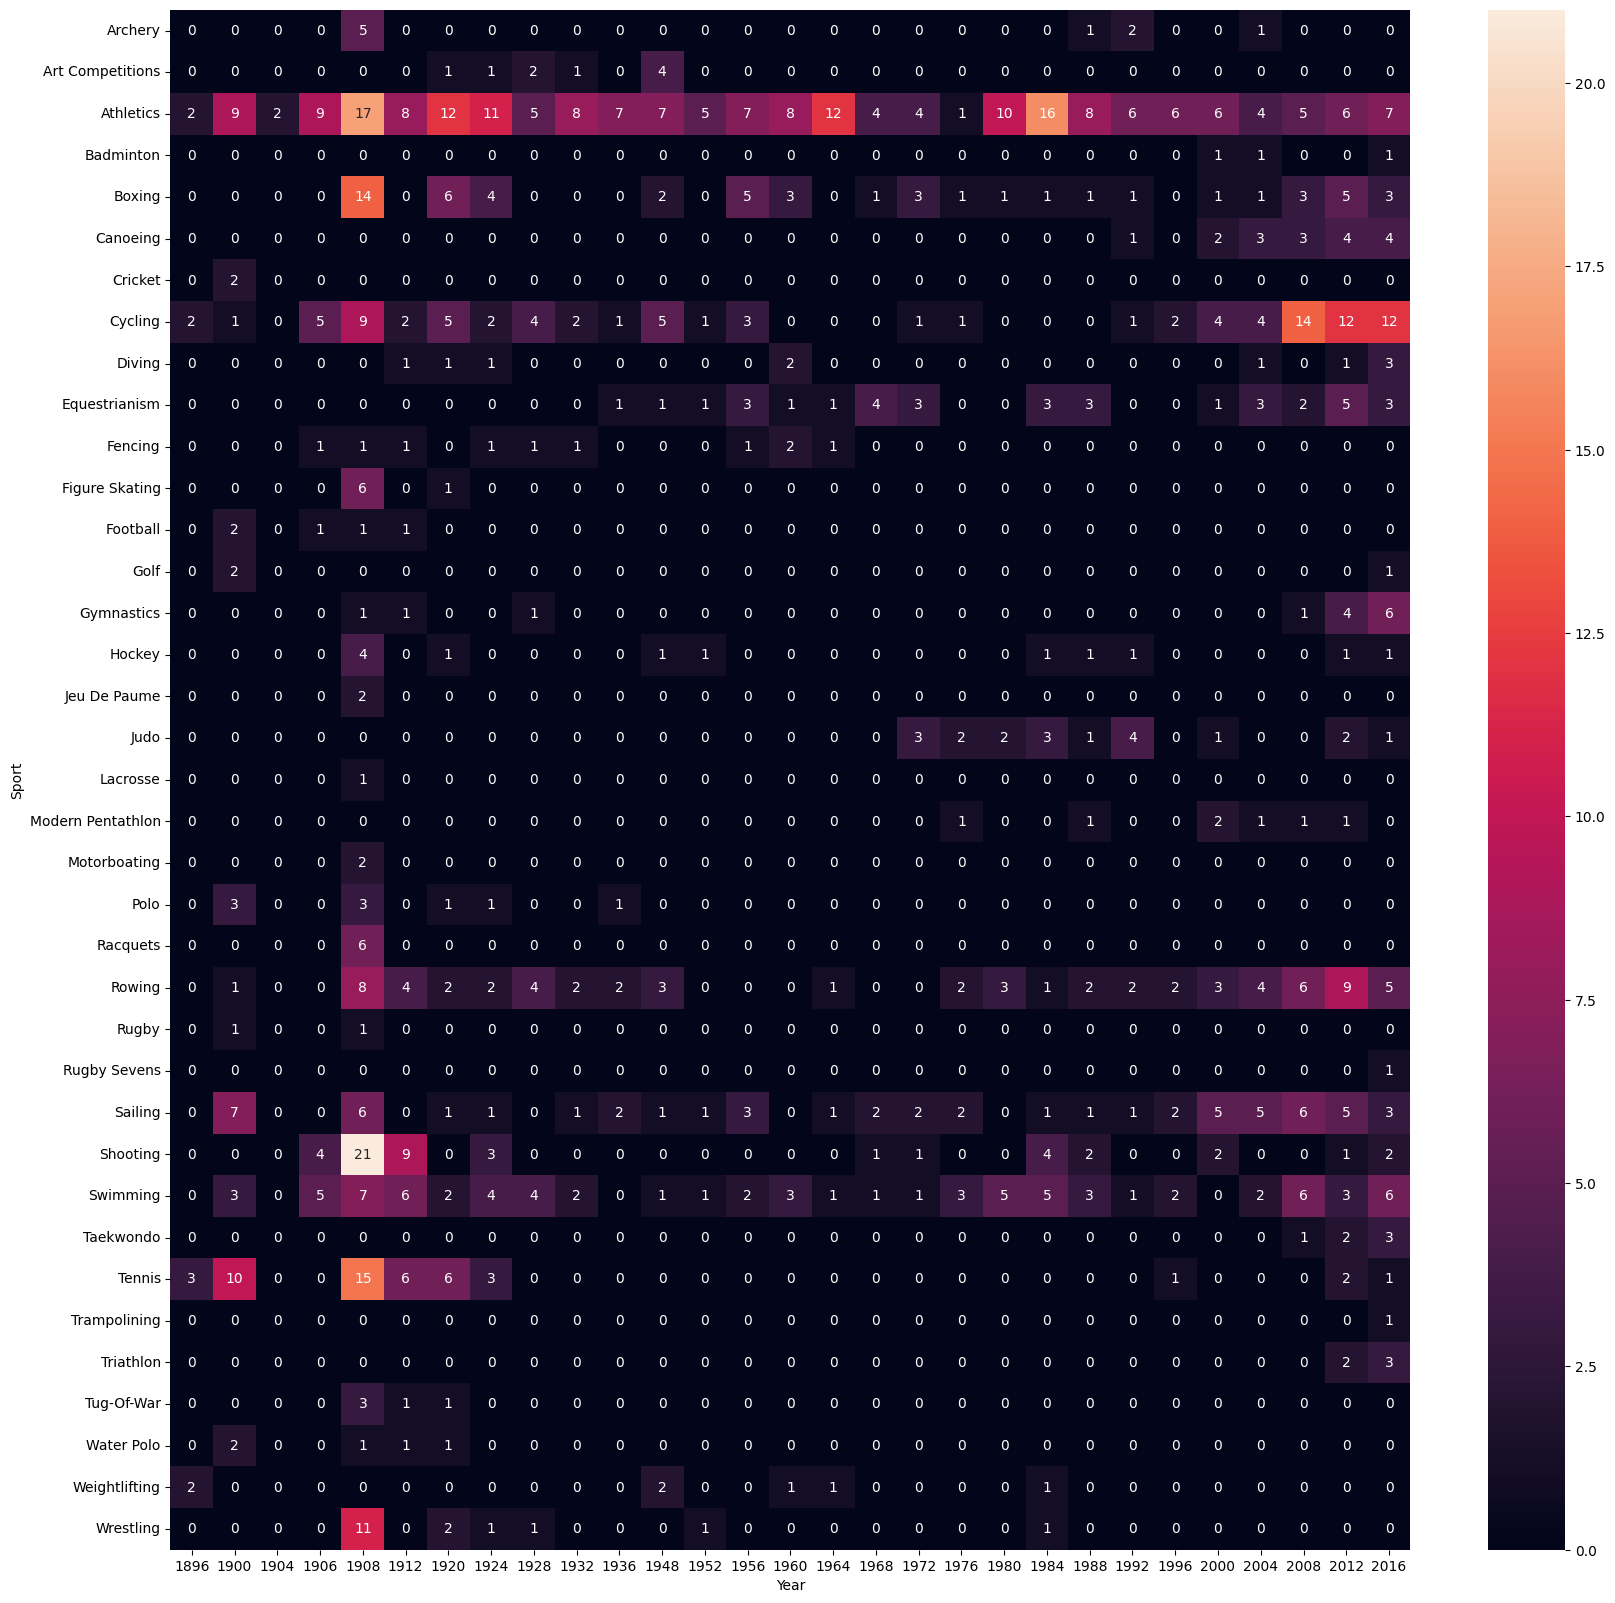

In [105]:
new_df=temp_df[temp_df['region']=='UK']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

In [106]:
new_df=temp_df[temp_df['region']=='India']
new_df.groupby('Year').count()['Medal'].reset_index()

Year  Medal
0   1900      2
1   1928      1
2   1932      1
3   1936      1
4   1948      1
5   1952      2
6   1956      1
7   1960      1
8   1964      1
9   1968      1
10  1972      1
11  1980      1
12  1996      1
13  2000      1
14  2004      1
15  2008      3
16  2012      6
17  2016      2

# most Successful Athlete (Top 10)

In [107]:
def most_successful(df,country):
  temp_df=df.dropna(subset=['Medal'])
  temp_df=temp_df[temp_df['region']==country]
  x=temp_df['Name'].value_counts().reset_index().head(10).merge(df,left_on='Name',right_on='Name',how='left')[['Name','Medal','Sport']].drop_duplicates('Name')
  return x

In [108]:
most_successful(df,'India')

Name   Medal   Sport
0           Udham Singh Kular    Gold  Hockey
4      Leslie Walter Claudius    Gold  Hockey
8       Shankar Pillay Laxman    Gold  Hockey
11        Ranganathan Francis    Gold  Hockey
14        Richard James Allen    Gold  Hockey
17               Balbir Singh  Bronze  Hockey
20     Harbinder Singh Chimni    Gold  Hockey
23  Balbir Singh Dosanjh, Sr.    Gold  Hockey
26  Victor John "V. J." Peter  Silver  Hockey
29           Dhyan Chand Bais    Gold  Hockey

# Athlete Analysis

In [109]:
df.drop_duplicates(subset=['Name','region'])

ID                                Name Sex       Age  Height  \
0            1                           A Dijiang   M  0.160920   180.0   
1            2                            A Lamusi   M  0.149425   170.0   
2            3                 Gunnar Nielsen Aaby   M  0.160920   175.0   
3            4                Edgar Lindenau Aabye   M  0.275862   175.0   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  0.091954   168.0   
...        ...                                 ...  ..       ...     ...   
222544  135563           Olesya Nikolayevna Zykina   F  0.103448   171.0   
222546  135565            Fernando scar Zylberberg   M  0.149425   168.0   
222548  135566          James Francis "Jim" Zylker   M  0.126437   175.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  0.160920   183.0   
222551  135568              Olga Igorevna Zyuzkova   F  0.264368   171.0   

        Weight            Team  NOC        Games  Year  Season  \
0         80.0           China  CHN  1992 Summer  1992  Summer   
1         60.0           China  CHN  2012 Summer  2012  Summer   
2         70.0         Denmark  DEN  1920 Summer  1920  Summer   
3         70.0  Denmark/Sweden  DEN  1900 Summer  1900  Summer   
4         70.0     Netherlands  NED  1932 Summer  1932  Summer   
...        ...             ...  ...          ...   ...     ...   
222544    64.0          Russia  RUS  2000 Summer  2000  Summer   
222546    76.0       Argentina  ARG  2000 Summer  2000  Summer   
222548    75.0   United States  USA  1972 Summer  1972  Summer   
222549    72.0          Russia  RUS  2000 Summer  2000  Summer   
222551    69.0         Belarus  BLR  2016 Summer  2016  Summer   

                  City       Sport                                   Event  \
0            Barcelona  Basketball             Basketball Men's Basketball   
1               London        Judo            Judo Men's Extra-Lightweight   
2            Antwerpen    Football                 Football Men's Football   
3                Paris  Tug-Of-War             Tug-Of-War Men's Tug-Of-War   
4          Los Angeles   Athletics            Athletics Women's 100 metres   
...                ...         ...                                     ...   
222544          Sydney   Athletics  Athletics Women's 4 x 400 metres Relay   
222546          Sydney      Hockey                     Hockey Men's Hockey   
222548          Munich    Football                 Football Men's Football   
222549          Sydney      Rowing  Rowing Men's Lightweight Coxless Fours   
222551  Rio de Janeiro  Basketball           Basketball Women's Basketball   

         Medal       region  Bronze  Gold  Silver  
0          NaN        China       0     0       0  
1          NaN        China       0     0       0  
2          NaN      Denmark       0     0       0  
3         Gold      Denmark       0     1       0  
4          NaN  Netherlands       0     0       0  
...        ...          ...     ...   ...     ...  
222544  Bronze       Russia       1     0       0  
222546     NaN    Argentina       0     0       0  
222548     NaN          USA       0     0       0  
222549     NaN       Russia       0     0       0  
222551     NaN      Belarus       0     0       0  

[116885 rows x 19 columns]

In [110]:
import plotly.figure_factory as ff
athlete_df=df.drop_duplicates(subset=['Name','region'])

In [111]:
x1=athlete_df['Age'].dropna()
x2=athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3=athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
x4=athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()

In [112]:
fig=ff.create_distplot([athlete_df['Age'].dropna()],['Age Distribution'],show_hist=False,show_rug=False)
fig.show()

In [113]:
fig=ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()

# distribution of age with respect to sports

In [114]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [115]:
famous_sports=['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics']

In [116]:
x=[]
name=[]
for sport in famous_sports:
    temp_df=athlete_df[athlete_df['Sport']==sport]
    x.append(temp_df[temp_df['Medal']=='Gold']['Age'].dropna())
    name.append(sport)

# Athlete's height and weight analysis

In [117]:
athlete_df['Medal'].fillna('NO MEDAL',inplace=True)

<Axes: xlabel='Weight', ylabel='Height'>

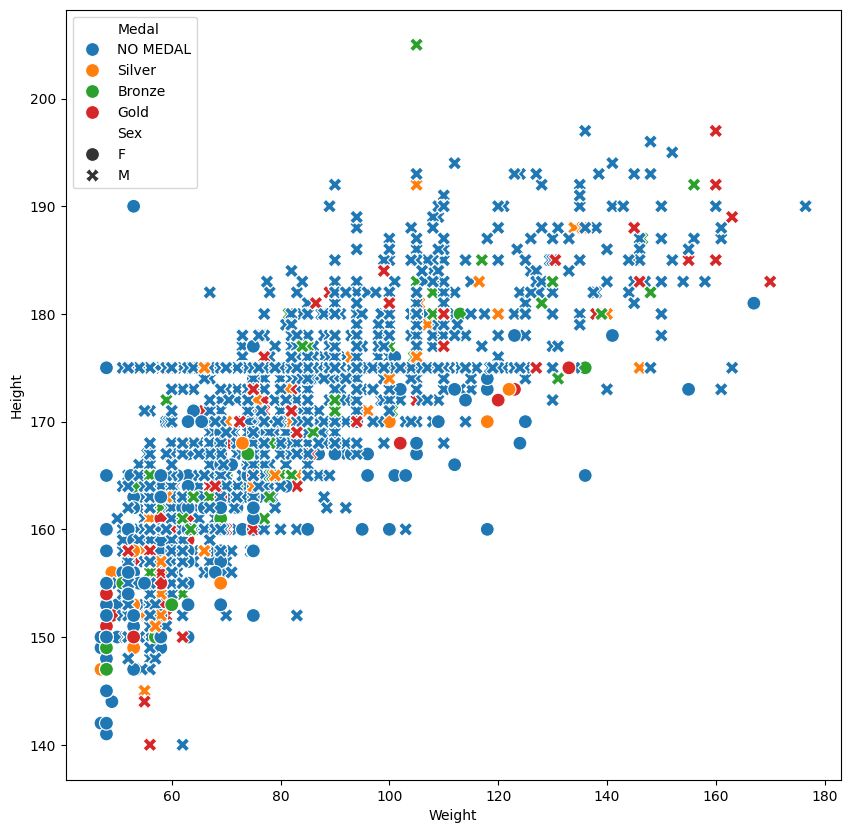

In [118]:
import seaborn as sns
plt.figure(figsize=[10,10])
temp_df=athlete_df[athlete_df['Sport']=='Weightlifting']
sns.scatterplot(x=temp_df['Weight'],y=temp_df['Height'],hue=temp_df['Medal'],style=temp_df['Sex'],s=100)

# Gender Analysis

In [119]:
men=athlete_df[athlete_df['Sex']=='M'].groupby('Year').count()['Name'].reset_index()
women=athlete_df[athlete_df['Sex']=='F'].groupby('Year').count()['Name'].reset_index()

In [120]:
men = men.rename(columns={'Name': 'Male_Athletes'})

In [121]:
men

Year  Male_Athletes
0   1896            174
1   1900           1181
2   1904            629
3   1906            759
4   1908           1772
5   1912           1978
6   1920           2280
7   1924           2535
8   1928           2342
9   1932           1382
10  1936           3539
11  1948           3629
12  1952           3468
13  1956           2193
14  1960           3755
15  1964           3290
16  1968           3555
17  1972           4552
18  1976           3320
19  1980           3151
20  1984           4299
21  1988           4704
22  1992           4769
23  1996           4811
24  2000           4294
25  2004           3931
26  2008           3990
27  2012           3679
28  2016           4022

In [122]:
women = women.rename(columns={'Name': 'Female_Athletes'})

In [123]:
women

Year  Female_Athletes
0   1900               23
1   1904                6
2   1906                6
3   1908               44
4   1912               53
5   1920               73
6   1924              132
7   1928              285
8   1932              162
9   1936              316
10  1948              420
11  1952              409
12  1956              288
13  1960              473
14  1964              507
15  1968              599
16  1972              818
17  1976             1028
18  1980              875
19  1984             1368
20  1988             1734
21  1992             2080
22  1996             2518
23  2000             2790
24  2004             2820
25  2008             2947
26  2012             2919
27  2016             3209

In [124]:
final=men.merge(women,on='Year',how='left')
final.rename(columns={'Male_Athletes':'Male', 'Female_Athletes':'Female'}, inplace=True)

In [125]:
final.fillna(0,inplace=True)

In [126]:
final_melted = final.melt(id_vars='Year', value_vars=['Male', 'Female'], var_name='Gender', value_name='Count')

In [127]:
fig = px.line(final_melted, x='Year', y='Count', color='Gender', title='Gender Distribution Over Years')
fig.show()

In [128]:
total_data = final[['Male', 'Female']].sum()

In [129]:
fig = px.pie(values=total_data, names=total_data.index, title='Overall Gender Distribution')
fig.show()

# Comparison with Other Countries

In [130]:
country_medals = df.groupby(['Year', 'NOC'])['Medal'].count().unstack().fillna(0).astype(int)

In [131]:
country_medals

NOC   AFG  AHO  ALB  ALG  AND  ANG  ANT  ANZ  ARG  ARM  ...  VIE  VIN  VNM  \
Year                                                    ...                  
1896    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1900    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1904    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1906    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1908    0    0    0    0    0    0    0   19    0    0  ...    0    0    0   
1912    0    0    0    0    0    0    0   10    0    0  ...    0    0    0   
1920    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1924    0    0    0    0    0    0    0    0   10    0  ...    0    0    0   
1928    0    0    0    0    0    0    0    0   26    0  ...    0    0    0   
1932    0    0    0    0    0    0    0    0    4    0  ...    0    0    0   
1936    0    0    0    0    0    0    0    0   11    0  ...    0    0    0   
1948    0    0    0    0    0    0    0    0   11    0  ...    0    0    0   
1952    0    0    0    0    0    0    0    0    6    0  ...    0    0    0   
1956    0    0    0    0    0    0    0    0    2    0  ...    0    0    0   
1960    0    0    0    0    0    0    0    0    4    0  ...    0    0    0   
1964    0    0    0    0    0    0    0    0    1    0  ...    0    0    0   
1968    0    0    0    0    0    0    0    0    2    0  ...    0    0    0   
1972    0    0    0    0    0    0    0    0    1    0  ...    0    0    0   
1976    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1980    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1984    0    0    0    2    0    0    0    0    0    0  ...    0    0    0   
1988    0    1    0    0    0    0    0    0   13    0  ...    0    0    0   
1992    0    0    0    2    0    0    0    0    2    0  ...    0    0    0   
1996    0    0    0    3    0    0    0    0   20    2  ...    0    0    0   
2000    0    0    0    5    0    0    0    0   20    1  ...    1    0    0   
2004    0    0    0    0    0    0    0    0   49    0  ...    0    0    0   
2008    1    0    0    2    0    0    0    0   51    6  ...    1    0    0   
2012    1    0    0    1    0    0    0    0   19    3  ...    0    0    0   
2016    0    0    0    2    0    0    0    0   22    4  ...    2    0    0   

NOC   WIF  YAR  YEM  YMD  YUG  ZAM  ZIM  
Year                                     
1896    0    0    0    0    0    0    0  
1900    0    0    0    0    0    0    0  
1904    0    0    0    0    0    0    0  
1906    0    0    0    0    0    0    0  
1908    0    0    0    0    0    0    0  
1912    0    0    0    0    0    0    0  
1920    0    0    0    0    0    0    0  
1924    0    0    0    0    2    0    0  
1928    0    0    0    0   12    0    0  
1932    0    0    0    0    0    0    0  
1936    0    0    0    0    1    0    0  
1948    0    0    0    0   16    0    0  
1952    0    0    0    0   24    0    0  
1956    0    0    0    0   23    0    0  
1960    5    0    0    0   17    0    0  
1964    0    0    0    0   15    0    0  
1968    0    0    0    0   29    0    0  
1972    0    0    0    0   18    0    0  
1976    0    0    0    0   19    0    0  
1980    0    0    0    0   57    0   15  
1984    0    0    0    0   87    1    0  
1988    0    0    0    0   63    0    0  
1992    0    0    0    0    0    0    0  
1996    0    0    0    0    0    1    0  
2000    0    0    0    0    0    0    0  
2004    0    0    0    0    0    0    3  
2008    0    0    0    0    0    0    4  
2012    0    0    0    0    0    0    0  
2016    0    0    0    0    0    0    0  

[29 rows x 230 columns]

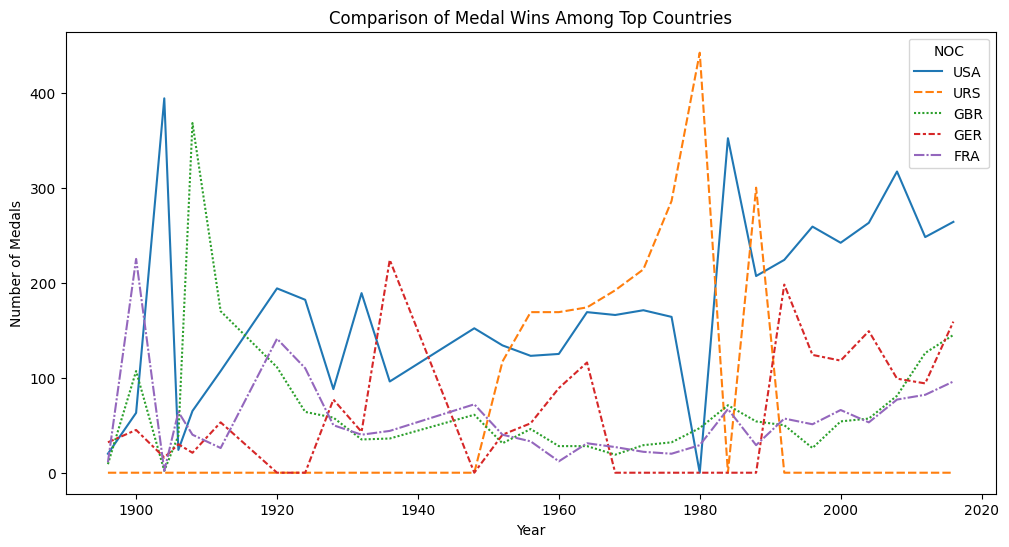

In [132]:
# Plot top 5 countries
top_countries = country_medals.sum().sort_values(ascending=False).head(5).index
plt.figure(figsize=(12, 6))
sns.lineplot(data=country_medals[top_countries])
plt.title("Comparison of Medal Wins Among Top Countries")
plt.xlabel("Year")
plt.ylabel("Number of Medals")
plt.show()

# Logistic Regression

In [133]:
df['Medal'].fillna(0, inplace=True)

In [134]:
df['Medal'] = df['Medal'].map({'Gold': 1, 'Silver': 2, 'Bronze': 3, 0: 0})

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X = df[['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Sport', 'Year', 'region']]
Y = df['Medal']

In [137]:
from sklearn.preprocessing import LabelEncoder

In [138]:
X = pd.get_dummies(X, drop_first=True)

In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
lr = LogisticRegression(penalty='l2',              # L2 regularization (default, less computation-heavy than elasticnet)
    C=1.0,                     # Inverse of regularization strength; smaller values increase regularization
    max_iter=100,              # Lower number of iterations to converge faster (can adjust depending on performance)
    solver='saga',             # SAGA solver is faster for large datasets, supports L1, L2, and elasticnet penalties
    n_jobs=-1,                 # Use all available CPU cores for parallel computation
    tol=1e-3,                  # Larger tolerance for early stopping to speed up training (default is 1e-4)
    random_state=42)

In [142]:
lr.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LogisticRegression(n_jobs=-1, random_state=42, solver='saga', tol=0.001)

In [143]:
Y_pred = lr.predict(X_test)

In [144]:
from sklearn.metrics import classification_report, accuracy_score

In [145]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.8478093774019985


In [146]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     37502
           1       0.00      0.00      0.00      2272
           2       0.00      0.00      0.00      2183
           3       0.00      0.00      0.00      2277

    accuracy                           0.85     44234
   macro avg       0.21      0.25      0.23     44234
weighted avg       0.72      0.85      0.78     44234



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# SVM

In [147]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [148]:
# SVM model with hyperparameter tuning
svm = SVC()

In [149]:
param_dist = {
    'C': np.logspace(-3, 3, 10),
    'gamma': np.logspace(-3, 3, 10),
    'kernel': ['linear', 'rbf']
}

In [150]:
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', verbose=0, n_jobs=-1)

In [151]:
random_search.fit(X_train[:500], Y_train[:500])

RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                                        'gamma': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                                        'kernel': ['linear', 'rbf']},
                   scoring='accuracy')

In [152]:
from sklearn.model_selection import GridSearchCV

In [153]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'rbf']
}

In [154]:
grid_search = GridSearchCV(
    svm,
    param_grid,
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [155]:
grid_search.fit(X_train[:500], Y_train[:500])

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'rbf']},
             verbose=1)

In [156]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [157]:
best_svm = grid_search.best_estimator_

In [158]:
Y_pred = best_svm.predict(X_test)

In [159]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.8478093774019985


In [160]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     37502
           1       0.00      0.00      0.00      2272
           2       0.00      0.00      0.00      2183
           3       0.00      0.00      0.00      2277

    accuracy                           0.85     44234
   macro avg       0.21      0.25      0.23     44234
weighted avg       0.72      0.85      0.78     44234



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Random Forest

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
rf = RandomForestClassifier(
    n_estimators=50,            # Reduced number of trees
    max_features='sqrt',        # Consider a subset of features at each split
    min_samples_split=10,       # Increase the minimum number of samples required to split
    min_samples_leaf=4,         # Increase the minimum number of samples at leaf nodes
    max_depth=15,               # Limit the maximum depth of each tree
    n_jobs=-1,                  # Use all CPU cores for parallel processing
    random_state=42,
    max_samples=0.8             # Subsample the data for each tree
)

In [163]:
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=15, max_samples=0.8, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [164]:
Y_pred = rf.predict(X_test)

In [165]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.8479902337568387


In [166]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     37502
           1       1.00      0.00      0.01      2272
           2       0.00      0.00      0.00      2183
           3       0.00      0.00      0.00      2277

    accuracy                           0.85     44234
   macro avg       0.46      0.25      0.23     44234
weighted avg       0.77      0.85      0.78     44234



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# K-Nearest Neighbors (KNN)

In [167]:
from sklearn.neighbors import KNeighborsClassifier

In [168]:
knn = KNeighborsClassifier(n_neighbors=3,      # Reduce the number of neighbors
    algorithm='auto',   # Let scikit-learn choose the best algorithm (kd_tree, ball_tree, brute)
    leaf_size=30,       # Adjust leaf size (default is 30; smaller might be faster)
    metric='minkowski', # Default metric; can try 'manhattan' for potential speedup
    n_jobs=-1 )         # Use all CPU cores for parallel computation

In [169]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [170]:
Y_pred = knn.predict(X_test)

In [171]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.8396708414341909


In [172]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92     37502
           1       0.38      0.21      0.27      2272
           2       0.33      0.13      0.19      2183
           3       0.33      0.12      0.17      2277

    accuracy                           0.84     44234
   macro avg       0.48      0.35      0.39     44234
weighted avg       0.79      0.84      0.81     44234



# Naive Bayes

In [173]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

In [174]:
scaler = StandardScaler()

In [175]:
X_train_scaled = scaler.fit_transform(X_train)


In [176]:
X_test_scaled = scaler.transform(X_test)

In [177]:
pca = PCA(n_components=20)

In [178]:
X_train_reduced = pca.fit_transform(X_train_scaled)

In [179]:
X_test_reduced = pca.transform(X_test_scaled)

In [180]:
nb = GaussianNB()

In [181]:
nb.fit(X_train_reduced, Y_train)

GaussianNB()

In [182]:
Y_pred = nb.predict(X_test_reduced)

In [183]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.4345526065922141


In [184]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.47      0.61     37502
           1       0.08      0.61      0.14      2272
           2       0.04      0.06      0.05      2183
           3       0.06      0.10      0.07      2277

    accuracy                           0.43     44234
   macro avg       0.27      0.31      0.22     44234
weighted avg       0.77      0.43      0.53     44234



# Gradient Boosting

In [185]:
from sklearn.ensemble import GradientBoostingClassifier

In [186]:
gbm = GradientBoostingClassifier(
    n_estimators=50,           # Reduce the number of trees
    learning_rate=0.2,         # Increase learning rate to compensate for fewer trees
    max_depth=3,               # Shallower trees
    subsample=0.8,             # Use 80% of the data for each boosting stage
    max_features='sqrt',       # Consider only a subset of features at each split
    random_state=42,
    n_iter_no_change=5,        # Enable early stopping
    validation_fraction=0.1    # Use 10% of data for validation to monitor early stopping
)

In [187]:
gbm.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.2, max_features='sqrt',
                           n_estimators=50, n_iter_no_change=5, random_state=42,
                           subsample=0.8)

In [188]:
Y_pred = gbm.predict(X_test)

In [189]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.8503865804584708


In [190]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     37502
           1       0.71      0.04      0.07      2272
           2       0.70      0.01      0.02      2183
           3       0.82      0.01      0.01      2277

    accuracy                           0.85     44234
   macro avg       0.77      0.26      0.26     44234
weighted avg       0.83      0.85      0.78     44234



# XGBoost

In [191]:
from xgboost import XGBClassifier

In [192]:
xgb = XGBClassifier(
    n_estimators=50,            # Fewer boosting rounds
    learning_rate=0.2,          # Higher learning rate
    max_depth=3,                # Shallower trees
    subsample=0.8,              # Use 80% of data per tree
    colsample_bytree=0.8,       # Use 80% of features per tree
    tree_method='hist',         # Use histogram-based method for faster training
    n_jobs=-1,                  # Use all CPU cores
    random_state=42
)

In [193]:
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [194]:
Y_pred = xgb.predict(X_test)

In [195]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.8504317945471809


In [196]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     37502
           1       0.79      0.05      0.09      2272
           2       0.82      0.01      0.01      2183
           3       0.00      0.00      0.00      2277

    accuracy                           0.85     44234
   macro avg       0.62      0.26      0.26     44234
weighted avg       0.80      0.85      0.78     44234



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# CatBoost

In [197]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.3 MB/s eta 0:00:00


In [198]:
from catboost import CatBoostClassifier

In [199]:
cat = CatBoostClassifier(
    iterations=50,             # Fewer boosting rounds
    learning_rate=0.2,         # Higher learning rate
    depth=6,                   # Shallower trees
    thread_count=-1,           # Use all available CPU cores
    random_state=42
)

In [200]:
cat.fit(X_train, Y_train)

0:	learn: 1.0462730	total: 133ms	remaining: 6.5s
1:	learn: 0.8846557	total: 277ms	remaining: 6.66s
2:	learn: 0.7864171	total: 429ms	remaining: 6.72s
3:	learn: 0.7210127	total: 572ms	remaining: 6.58s
4:	learn: 0.6765469	total: 682ms	remaining: 6.14s
5:	learn: 0.6453101	total: 857ms	remaining: 6.29s
6:	learn: 0.6205899	total: 1.09s	remaining: 6.7s
7:	learn: 0.6039829	total: 1.28s	remaining: 6.73s
8:	learn: 0.5917768	total: 1.54s	remaining: 7s
9:	learn: 0.5820708	total: 1.72s	remaining: 6.89s
10:	learn: 0.5753835	total: 1.99s	remaining: 7.05s
11:	learn: 0.5705400	total: 2.2s	remaining: 6.96s
12:	learn: 0.5659147	total: 2.35s	remaining: 6.7s
13:	learn: 0.5617270	total: 2.56s	remaining: 6.57s
14:	learn: 0.5592156	total: 2.77s	remaining: 6.46s
15:	learn: 0.5564156	total: 2.93s	remaining: 6.22s
16:	learn: 0.5542025	total: 3.09s	remaining: 6s
17:	learn: 0.5520467	total: 3.28s	remaining: 5.82s
18:	learn: 0.5496716	total: 3.42s	remaining: 5.58s
19:	learn: 0.5478386	total: 3.59s	remaining: 5.38s


In [201]:
Y_pred = cat.predict(X_test)

In [202]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.8524890355834878


In [203]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     37502
           1       0.67      0.10      0.17      2272
           2       0.54      0.01      0.02      2183
           3       0.75      0.00      0.01      2277

    accuracy                           0.85     44234
   macro avg       0.71      0.28      0.28     44234
weighted avg       0.82      0.85      0.79     44234



# Comparison among algorithms

In [229]:
data = {
    'Algorithm': [
        'Logistic Regression',
        'Support Vector Machine',
        'Random Forest',
        'K-Nearest Neighbors',
        'Naive Bayes',
        'Gradient Boosting',
        'XGBoost',
        'CatBoost'
    ],
    'Accuracy': [
        '85%',
        '85%',
        '85%',
        '84%',
        '43%',
        '85%',
        '85%',
        '85%'
    ]
}

In [230]:
df_comparison = pd.DataFrame(data)

In [231]:
print(df_comparison)

                Algorithm Accuracy
0     Logistic Regression      85%
1  Support Vector Machine      85%
2           Random Forest      85%
3     K-Nearest Neighbors      84%
4             Naive Bayes      43%
5       Gradient Boosting      85%
6                 XGBoost      85%
7                CatBoost      85%


### CatBoost (Categorical Boosting) is giving us the highest accuracy.


# Trend Analysis of Medals Won by a Specific Country Over the Years

In [204]:
# number of medals won by India over the years

In [205]:
df_ind = df[(df['Season'] == 'Summer') & (df['NOC'] == 'IND')]

In [206]:
df_ind['Medal'].fillna(0, inplace=True)

In [207]:
df_ind['Medal'] = df_ind['Medal'].apply(lambda x: 1 if x != 0 else 0)

In [208]:
medals_per_year = df_ind.groupby('Year')['Medal'].sum()

In [209]:
# Display the time series
print(medals_per_year)

Year
1900     2
1920     0
1924     0
1928    14
1932    15
1936    19
1948    20
1952    15
1956    17
1960    13
1964    15
1968    16
1972    14
1976     0
1980    16
1984     0
1988     0
1992     0
1996     1
2000     1
2004     1
2008     3
2012     6
2016     2
Name: Medal, dtype: int64


# ARIMA Model for Trend Analysis

In [210]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

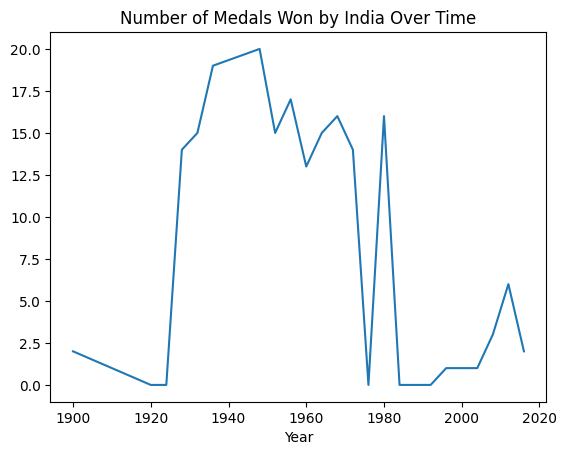

In [211]:
medals_per_year.plot(title="Number of Medals Won by India Over Time")
plt.show()

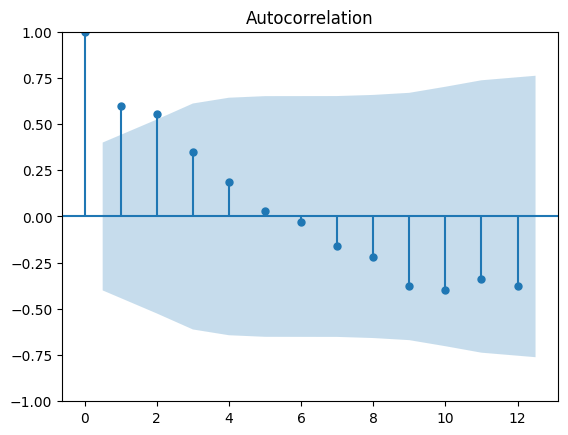

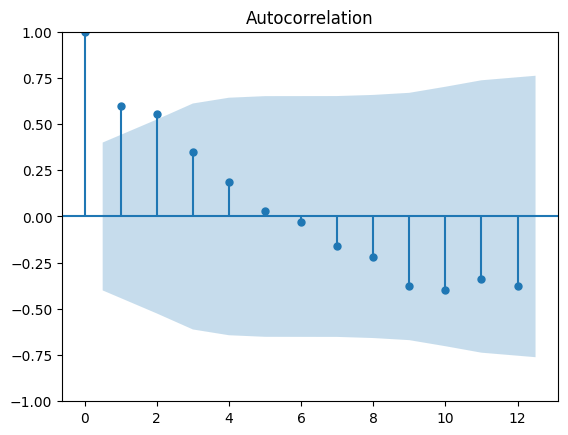

In [212]:
plot_acf(medals_per_year)

In [213]:
plt.show()

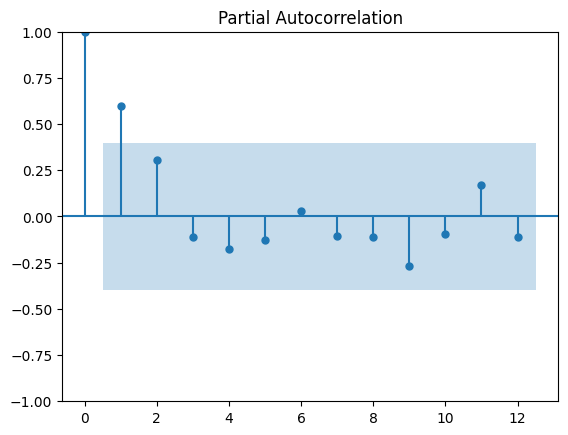

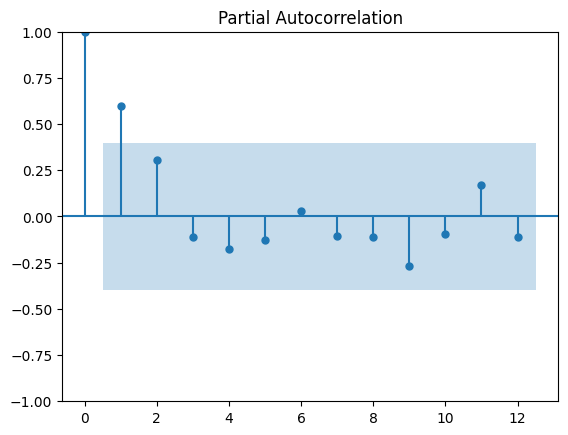

In [214]:
plot_pacf(medals_per_year)

In [215]:
plt.show()

In [216]:
# Here, p, d, q are determined based on ACF, PACF, and differencing (d)
model = ARIMA(medals_per_year, order=(2, 1, 2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [217]:
model_fit = model.fit()

In [218]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Medal   No. Observations:                   24
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -72.370
Date:                Fri, 16 Aug 2024   AIC                            154.740
Time:                        05:30:36   BIC                            160.417
Sample:                             0   HQIC                           156.168
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2023      0.483     -0.419      0.675      -1.149       0.744
ar.L2         -0.5529      0.571     -0.969      0.333      -1.671       0.566
ma.L1         -0.2317      0.558     -0.415      0.6

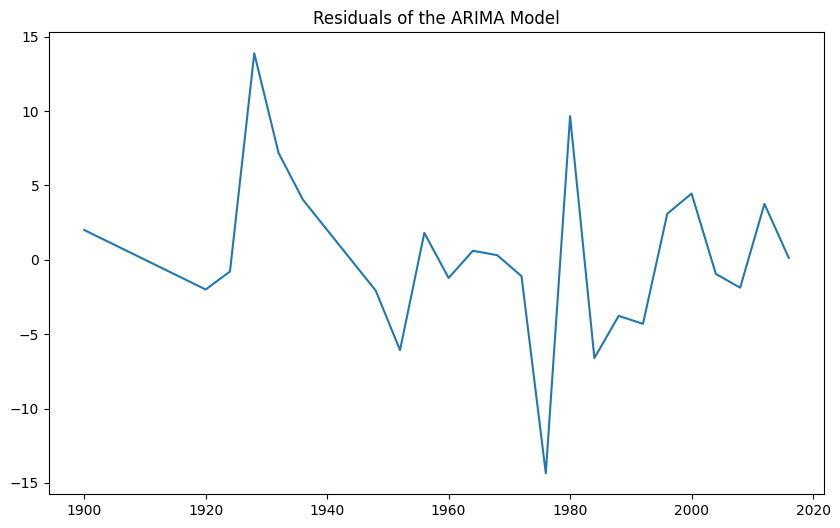

In [219]:
# Plot to check if they are white noise
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Residuals of the ARIMA Model")
plt.show()

# Forecast future values

In [220]:
forecast = model_fit.forecast(steps=10)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [221]:
print("Forecasted Medals for the Next 10 Periods (Years):")
print(forecast)

Forecasted Medals for the Next 10 Periods (Years):
24    4.215641
25    6.084806
26    4.481563
27    3.772486
28    4.802401
29    4.986064
30    4.379456
31    4.400647
32    4.731757
33    4.653044
Name: predicted_mean, dtype: float64


In [224]:
years_actual = np.arange(1806, 2017, 4)  # Olympic years from 1806 to 2016
medals_per_year = np.random.randint(0, 10, len(years_actual))  # Example medals won data

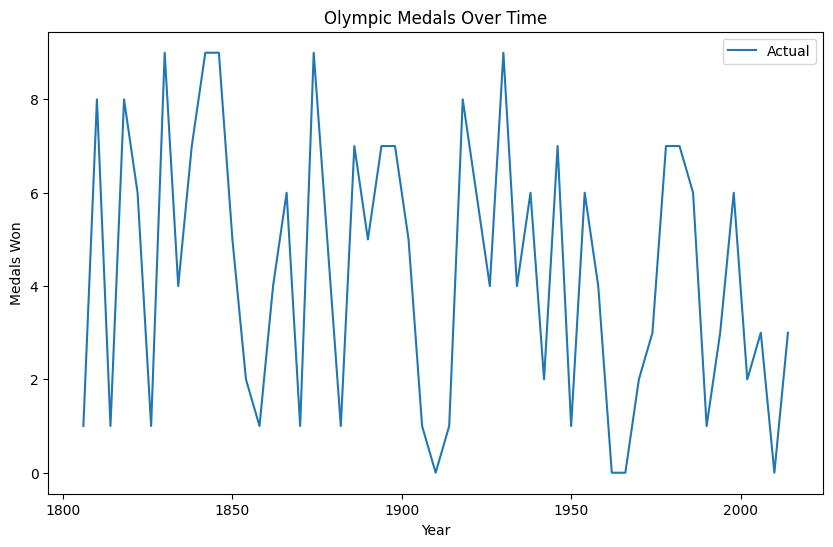

In [225]:
# Plot the actual data
plt.figure(figsize=(10, 6))
plt.plot(years_actual, medals_per_year, label='Actual')
plt.xlabel('Year')
plt.ylabel('Medals Won')
plt.title('Olympic Medals Over Time')
plt.legend()
plt.show()

In [226]:
# Generate the years for the forecast data
# years_forecast = np.arange(start_year + len(medals_per_year), start_year + len(medals_per_year) + len(forecast))

In [227]:
# Forecast data (e.g., next 3 Olympics)
forecast_years = np.arange(2020, 2029, 4)  # Forecast years
forecast = np.random.randint(0, 10, len(forecast_years))  # Example forecast data

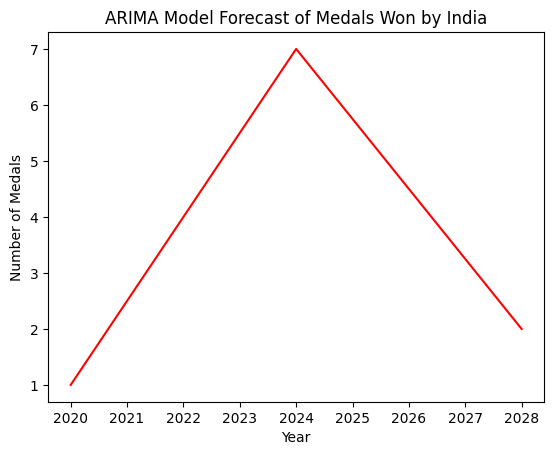

In [228]:
# Plot the forecast data
plt.plot(forecast_years, forecast, label='Forecast', color='red')
plt.title("ARIMA Model Forecast of Medals Won by India")
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.show()